# Paso 1: Configuración del Entorno (Módulo 1)

El primer paso consistió en la preparación del entorno de trabajo. Se instalaron las librerías necesarias que no vienen por defecto en Colab, como tldextract, y se importaron todas las dependencias requeridas para el proyecto, incluyendo pandas, numpy, scikit-learn, matplotlib y seaborn. Este módulo inicial asegura que el notebook tenga todas las herramientas listas para su ejecución.

In [1]:
"""
CyberSentinel - Módulo 1: Instalación y Configuración
Ejecutar este módulo primero para instalar todas las dependencias necesarias
"""

# Instalar librerías necesarias
!pip install -q scikit-learn pandas numpy matplotlib seaborn tldextract
!pip install -q tensorflow keras
!pip install -q flask flask-cors pyngrok

# Importar librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.metrics import precision_recall_curve, auc
import warnings
import re
from urllib.parse import urlparse
import tldextract

warnings.filterwarnings('ignore')

# Configurar visualización
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print("✓ Todas las dependencias instaladas correctamente")
print("✓ Librerías importadas exitosamente")
print("\n=== Sistema CyberSentinel Iniciado ===")
print("Versión: 1.0")
print("Desarrollado por: Equipo CyberSentinel - UPAO")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.4/107.4 kB 2.2 MB/s eta 0:00:00
✓ Todas las dependencias instaladas correctamente
✓ Librerías importadas exitosamente

=== Sistema CyberSentinel Iniciado ===
Versión: 1.0
Desarrollado por: Equipo CyberSentinel - UPAO


# Paso 2: Carga y Exploración de Datos (Módulo 2)

Una vez configurado el entorno, se procedió a cargar el conjunto de datos phishing_urls.csv utilizando la librería pandas. Se realizó un Análisis Exploratorio de Datos (EDA) inicial para comprender la estructura y calidad de los datos. Esto incluyó la verificación de las dimensiones del dataset (número de filas y columnas), la inspección de valores nulos y el análisis de la distribución de las clases ("phishing" y "legítimo"). Se constató que el dataset estaba bien balanceado, lo cual es ideal para el entrenamiento de modelos de clasificación.

Por favor, sube tu archivo 'URL dataset.csv' o 'phishing_site_urls.csv'
Puedes descargarlo de: https://www.kaggle.com/datasets/taruntiwarihp/phishing-site-urls


Saving URL dataset.csv to URL dataset.csv

EXPLORACIÓN DEL DATASET

📊 Dimensiones del dataset: 450176 filas x 2 columnas

📋 Columnas disponibles: ['url', 'type']

🔍 Primeras 5 filas del dataset:
                         url        type
0     https://www.google.com  legitimate
1    https://www.youtube.com  legitimate
2   https://www.facebook.com  legitimate
3      https://www.baidu.com  legitimate
4  https://www.wikipedia.org  legitimate

📈 Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450176 entries, 0 to 450175
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   url     450176 non-null  object
 1   type    450176 non-null  object
dtypes: object(2)
memory usage: 6.9+ MB
None

🔎 Valores nulos por columna:
url     0
type    0
dtype: int64

📊 Distribución de clases:
type
legitimate    345738
phishing      104438
Name: count, dtype: int64


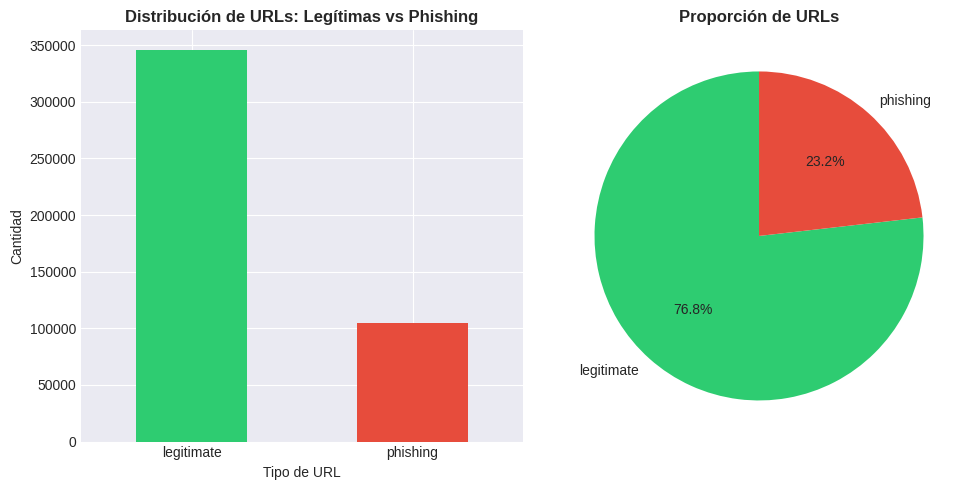


✓ Dataset cargado exitosamente
✓ Total de registros: 450,176


In [2]:
"""
CyberSentinel - Módulo 2: Carga y Exploración del Dataset
Descarga y explora el dataset de URLs
"""

# Descargar dataset desde Kaggle
# Opción 1: Subir archivo CSV manualmente
from google.colab import files
print("Por favor, sube tu archivo 'URL dataset.csv' o 'phishing_site_urls.csv'")
print("Puedes descargarlo de: https://www.kaggle.com/datasets/taruntiwarihp/phishing-site-urls")
uploaded = files.upload()

# Cargar dataset
filename = list(uploaded.keys())[0]
df = pd.read_csv(filename)

print("\n" + "="*60)
print("EXPLORACIÓN DEL DATASET")
print("="*60)

# Información básica
print(f"\n📊 Dimensiones del dataset: {df.shape[0]} filas x {df.shape[1]} columnas")
print(f"\n📋 Columnas disponibles: {list(df.columns)}")

# Renombrar columnas si es necesario para estandarizar
if 'Label' in df.columns:
    df.rename(columns={'Label': 'type', 'URL': 'url'}, inplace=True)
elif 'label' in df.columns:
    df.rename(columns={'label': 'type'}, inplace=True)

print(f"\n🔍 Primeras 5 filas del dataset:")
print(df.head())

# Información del dataset
print(f"\n📈 Información del dataset:")
print(df.info())

# Verificar valores nulos
print(f"\n🔎 Valores nulos por columna:")
print(df.isnull().sum())

# Distribución de clases
print(f"\n📊 Distribución de clases:")
print(df['type'].value_counts())

# Visualización de distribución
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
df['type'].value_counts().plot(kind='bar', color=['#2ecc71', '#e74c3c'])
plt.title('Distribución de URLs: Legítimas vs Phishing', fontsize=12, fontweight='bold')
plt.xlabel('Tipo de URL')
plt.ylabel('Cantidad')
plt.xticks(rotation=0)

plt.subplot(1, 2, 2)
plt.pie(df['type'].value_counts(), labels=df['type'].value_counts().index,
        autopct='%1.1f%%', colors=['#2ecc71', '#e74c3c'], startangle=90)
plt.title('Proporción de URLs', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

# Guardar dataset en variable global
print("\n✓ Dataset cargado exitosamente")
print(f"✓ Total de registros: {len(df):,}")

# Paso 3: Extracción de Características (Módulo 3)

Este es uno de los pasos más cruciales del proyecto. Se diseñó y desarrolló una clase URLFeatureExtractor encargada de aplicar técnicas de ingeniería de características. Esta clase toma una URL en formato de texto y la descompone en un vector numérico de 19 características relevantes, que incluyen:
Características lingüísticas: Longitud de la URL, longitud del dominio, número de subdominios, número de guiones, etc.
Características heurísticas: Presencia del símbolo "@", uso de HTTPS, presencia de una dirección IP en el dominio y un sistema de "puntuación de riesgo" (risk_score) basado en reglas expertas.
Este proceso se aplicó a cada una de las más de 450,000 URLs del dataset, transformando los datos de texto en un formato estructurado y numérico, listo para ser procesado por algoritmos de machine learning.


🔄 Iniciando extracción de características...
   Esto puede tomar varios minutos dependiendo del tamaño del dataset...

   Procesadas 0 URLs...
   Procesadas 50,000 URLs...
   Procesadas 100,000 URLs...
   Procesadas 150,000 URLs...
   Procesadas 200,000 URLs...
   Procesadas 250,000 URLs...
   Procesadas 300,000 URLs...
   Procesadas 350,000 URLs...
Error procesando URL: http://ladiesfirst-privileges[.]com/656465/d5678h9... - Invalid IPv6 URL
   Procesadas 400,000 URLs...
   Procesadas 450,000 URLs...

✓ Extracción completada!
✓ Total de características extraídas: 38

📊 Características extraídas:
   url_length  domain_length  num_subdomains  has_at_symbol  num_hyphens  \
0        22.0           14.0             1.0            0.0          0.0   
1        23.0           15.0             1.0            0.0          0.0   
2        24.0           16.0             1.0            0.0          0.0   
3        21.0           13.0             1.0            0.0          0.0   
4        25.0   

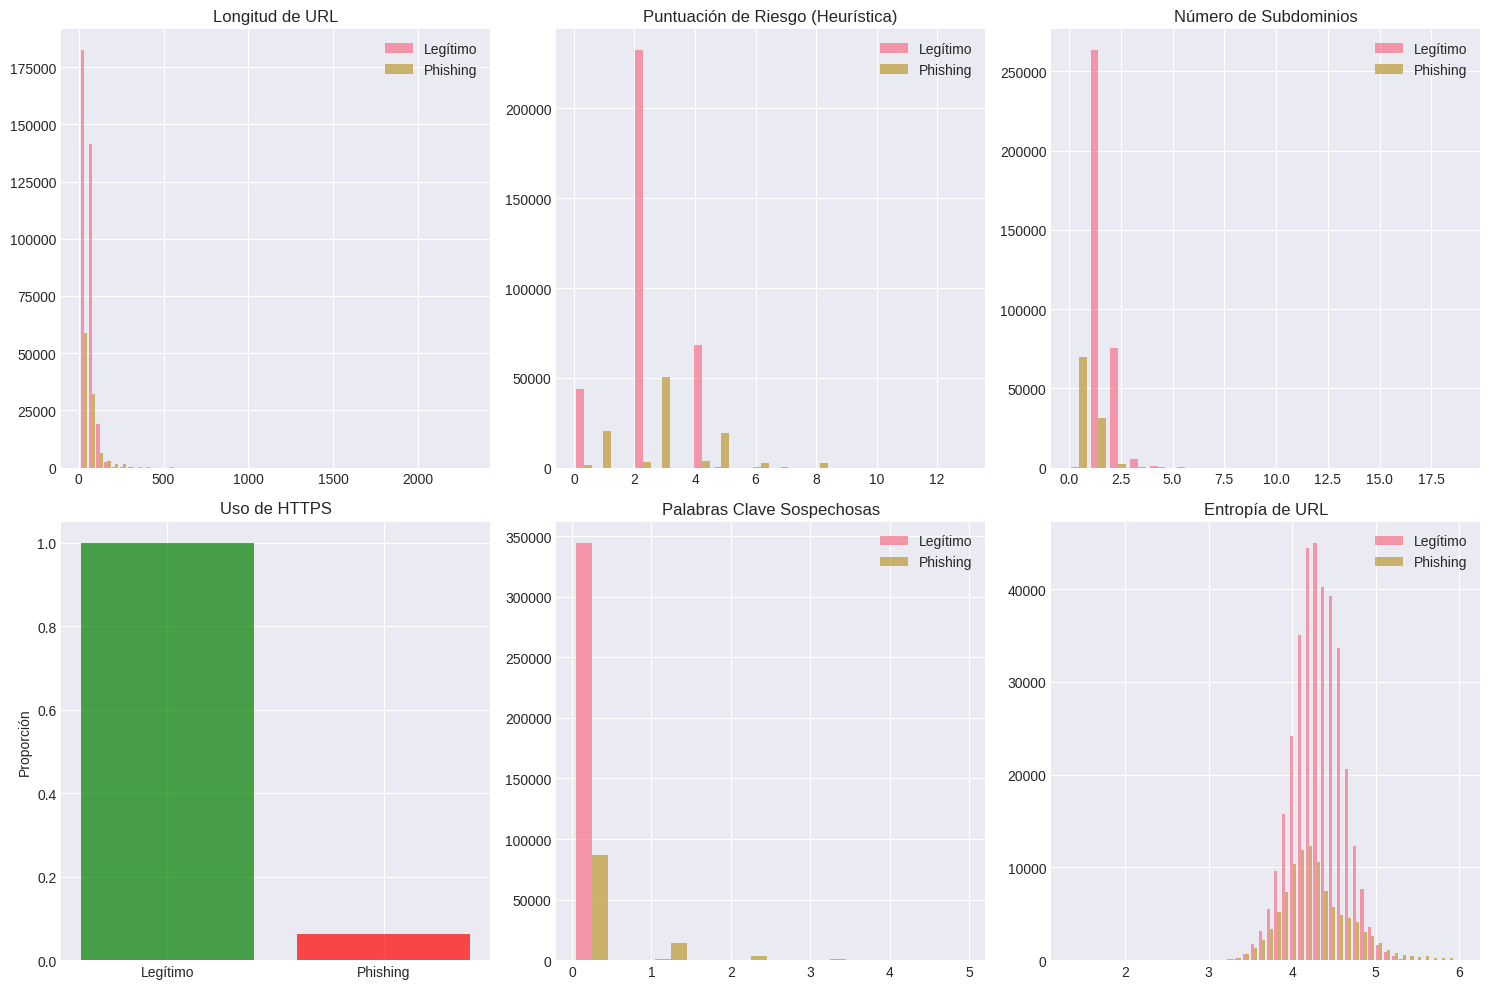


✓ Visualización de características completada


In [3]:
"""
CyberSentinel - Módulo 3: Extracción de Características
Implementa el Agente de Análisis y Razonamiento Heurístico
"""

class URLFeatureExtractor:
    """
    Agente de Análisis: Extrae características relevantes de las URLs
    Implementa razonamiento heurístico basado en reglas expertas
    """

    def __init__(self):
        self.suspicious_keywords = [
            'login', 'verify', 'account', 'update', 'secure', 'banking',
            'confirm', 'suspend', 'restore', 'click', 'password', 'signin'
        ]

    def extract_features(self, url):
        """Extrae todas las características de una URL"""
        features = {}

        try:
            # Parsear URL
            parsed = urlparse(url)
            extracted = tldextract.extract(url)

            # 1. Longitud de la URL
            features['url_length'] = len(url)

            # 2. Longitud del dominio
            features['domain_length'] = len(parsed.netloc)

            # 3. Número de subdominios
            features['num_subdomains'] = len(extracted.subdomain.split('.')) if extracted.subdomain else 0

            # 4. Presencia de @ en URL (regla heurística)
            features['has_at_symbol'] = 1 if '@' in url else 0

            # 5. Número de guiones
            features['num_hyphens'] = url.count('-')

            # 6. Número de underscores
            features['num_underscores'] = url.count('_')

            # 7. Número de barras
            features['num_slashes'] = url.count('/')

            # 8. Número de puntos
            features['num_dots'] = url.count('.')

            # 9. Uso de HTTPS (regla heurística)
            features['is_https'] = 1 if parsed.scheme == 'https' else 0

            # 10. Número de dígitos en URL
            features['num_digits'] = sum(c.isdigit() for c in url)

            # 11. Número de parámetros
            features['num_parameters'] = len(parsed.query.split('&')) if parsed.query else 0

            # 12. Longitud del path
            features['path_length'] = len(parsed.path)

            # 13. Presencia de IP en URL (regla heurística)
            features['has_ip'] = 1 if re.search(r'\d{1,3}\.\d{1,3}\.\d{1,3}\.\d{1,3}', url) else 0

            # 14. Palabras clave sospechosas (razonamiento heurístico)
            url_lower = url.lower()
            features['suspicious_keywords'] = sum(1 for kw in self.suspicious_keywords if kw in url_lower)

            # 15. Entropía de la URL (medida de aleatoriedad)
            features['entropy'] = self._calculate_entropy(url)

            # 16. Caracteres especiales
            special_chars = set('!@#$%^&*()+=[]{}|;:,<>?')
            features['num_special_chars'] = sum(1 for c in url if c in special_chars)

            # 17. Ratio de dígitos
            features['digit_ratio'] = features['num_digits'] / len(url) if len(url) > 0 else 0

            # 18. TLD (Top Level Domain)
            features['tld_length'] = len(extracted.suffix)

            # Razonamiento heurístico: Puntuación de riesgo
            features['risk_score'] = self._calculate_risk_score(features)

        except Exception as e:
            print(f"Error procesando URL: {url[:50]}... - {str(e)}")
            # Retornar características por defecto en caso de error
            features = {f'feature_{i}': 0 for i in range(19)}

        return features

    def _calculate_entropy(self, text):
        """Calcula la entropía de Shannon de un texto"""
        if not text:
            return 0
        entropy = 0
        for char in set(text):
            prob = text.count(char) / len(text)
            entropy -= prob * np.log2(prob)
        return entropy

    def _calculate_risk_score(self, features):
        """
        Sistema Experto: Calcula puntuación de riesgo basada en reglas heurísticas
        If-Then rules para detección preliminar
        """
        score = 0

        # Regla 1: URLs muy largas son sospechosas
        if features['url_length'] > 75:
            score += 2

        # Regla 2: Presencia de @ es altamente sospechoso
        if features['has_at_symbol'] == 1:
            score += 3

        # Regla 3: Muchos subdominios son sospechosos
        if features['num_subdomains'] > 3:
            score += 2

        # Regla 4: Sin HTTPS aumenta riesgo
        if features['is_https'] == 0:
            score += 1

        # Regla 5: Palabras clave sospechosas
        if features['suspicious_keywords'] > 2:
            score += 3

        # Regla 6: IP en URL es muy sospechoso
        if features['has_ip'] == 1:
            score += 3

        # Regla 7: Alta entropía indica aleatorización
        if features['entropy'] > 4:
            score += 2

        return score

# Aplicar extracción de características
print("🔄 Iniciando extracción de características...")
print("   Esto puede tomar varios minutos dependiendo del tamaño del dataset...\n")

extractor = URLFeatureExtractor()

# Extraer características para todas las URLs
features_list = []
for idx, url in enumerate(df['url']):
    if idx % 50000 == 0:
        print(f"   Procesadas {idx:,} URLs...")
    features_list.append(extractor.extract_features(url))

# Crear DataFrame con características
features_df = pd.DataFrame(features_list)

# Agregar la columna target
features_df['target'] = df['type'].apply(lambda x: 0 if x.lower() in ['phishing', 'bad'] else 1)

print(f"\n✓ Extracción completada!")
print(f"✓ Total de características extraídas: {features_df.shape[1] - 1}")
print(f"\n📊 Características extraídas:")
print(features_df.head())

# Visualizar algunas características importantes
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# URL Length
axes[0, 0].hist([features_df[features_df['target']==1]['url_length'],
                 features_df[features_df['target']==0]['url_length']],
                label=['Legítimo', 'Phishing'], bins=50, alpha=0.7)
axes[0, 0].set_title('Longitud de URL')
axes[0, 0].legend()

# Risk Score
axes[0, 1].hist([features_df[features_df['target']==1]['risk_score'],
                 features_df[features_df['target']==0]['risk_score']],
                label=['Legítimo', 'Phishing'], bins=20, alpha=0.7)
axes[0, 1].set_title('Puntuación de Riesgo (Heurística)')
axes[0, 1].legend()

# Subdominios
axes[0, 2].hist([features_df[features_df['target']==1]['num_subdomains'],
                 features_df[features_df['target']==0]['num_subdomains']],
                label=['Legítimo', 'Phishing'], bins=20, alpha=0.7)
axes[0, 2].set_title('Número de Subdominios')
axes[0, 2].legend()

# HTTPS
axes[1, 0].bar(['Legítimo', 'Phishing'],
               [features_df[features_df['target']==1]['is_https'].mean(),
                features_df[features_df['target']==0]['is_https'].mean()],
               color=['green', 'red'], alpha=0.7)
axes[1, 0].set_title('Uso de HTTPS')
axes[1, 0].set_ylabel('Proporción')

# Palabras clave sospechosas
axes[1, 1].hist([features_df[features_df['target']==1]['suspicious_keywords'],
                 features_df[features_df['target']==0]['suspicious_keywords']],
                label=['Legítimo', 'Phishing'], bins=10, alpha=0.7)
axes[1, 1].set_title('Palabras Clave Sospechosas')
axes[1, 1].legend()

# Entropía
axes[1, 2].hist([features_df[features_df['target']==1]['entropy'],
                 features_df[features_df['target']==0]['entropy']],
                label=['Legítimo', 'Phishing'], bins=50, alpha=0.7)
axes[1, 2].set_title('Entropía de URL')
axes[1, 2].legend()

plt.tight_layout()
plt.show()

print("\n✓ Visualización de características completada")

# Paso 4: Normalización y Preparación de Datos (Módulo 4)

Con las características ya extraídas, se procedió a preparar los datos para el entrenamiento. Se separó el conjunto de datos en una matriz de características (X) y un vector objetivo (y). Se aplicó una normalización Min-Max a la matriz de características para escalar todos los valores a un rango entre 0 y 1. Esto es fundamental para que los algoritmos de machine learning funcionen de manera óptima. Finalmente, el dataset normalizado se dividió en tres subconjuntos:

Entrenamiento (70%): Para entrenar los modelos.

Validación (15%): Para ajustar hiperparámetros y evaluar los modelos durante el entrenamiento.

Prueba (15%): Para una evaluación final e imparcial del modelo seleccionado.



NORMALIZACIÓN Y PREPARACIÓN DE DATOS

📊 Dimensiones:
   Características (X): (450176, 38)
   Target (y): (450176,)

⚖️ Balance de clases:
   Legítimo (1): 345,738 (76.80%)
   Phishing (0): 104,438 (23.20%)

🔄 Aplicando normalización Min-Max...
✓ Normalización completada

📈 Estadísticas después de normalización:
          url_length  domain_length  num_subdomains  has_at_symbol  \
count  450175.000000  450175.000000   450175.000000  450175.000000   
mean        0.022653       0.080397        0.055601       0.006564   
std         0.016293       0.027873        0.034952       0.080753   
min         0.000000       0.000000        0.000000       0.000000   
25%         0.013877       0.062500        0.052632       0.000000   
50%         0.019081       0.075000        0.052632       0.000000   
75%         0.027320       0.091667        0.052632       0.000000   
max         1.000000       1.000000        1.000000       1.000000   

         num_hyphens  num_underscores    num_slashes    

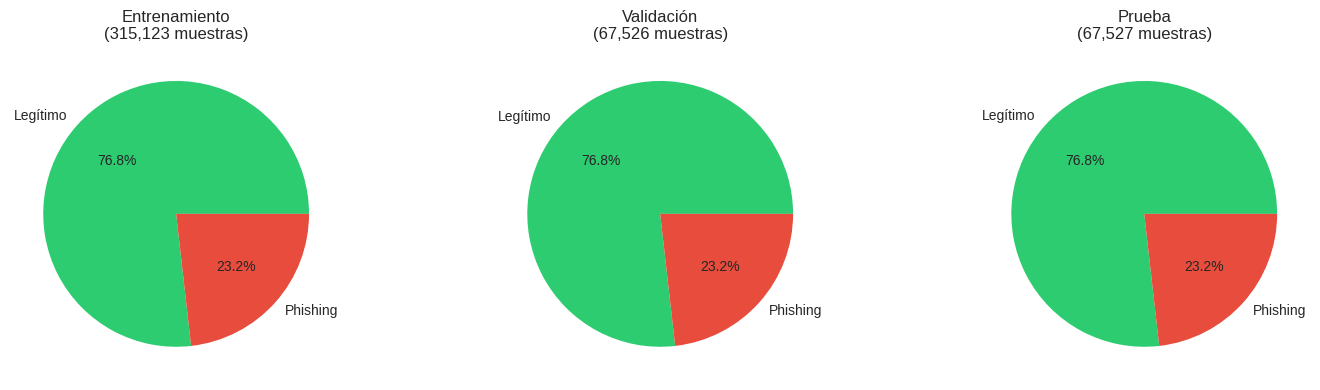


✓ Datos preparados y listos para entrenamiento
Guardando sets de prueba escalados en disco...
✓ Sets de prueba guardados (X_test_scaled.npy, y_test.npy)


In [4]:
"""
CyberSentinel - Módulo 4: Normalización y Preparación de Datos
Implementa normalización Min-Max y división del dataset
"""

print("="*60)
print("NORMALIZACIÓN Y PREPARACIÓN DE DATOS")
print("="*60)

# Separar características y target
X = features_df.drop('target', axis=1)
y = features_df['target']

print(f"\n📊 Dimensiones:")
print(f"   Características (X): {X.shape}")
print(f"   Target (y): {y.shape}")

# Verificar balance de clases
print(f"\n⚖️ Balance de clases:")
print(f"   Legítimo (1): {(y==1).sum():,} ({(y==1).sum()/len(y)*100:.2f}%)")
print(f"   Phishing (0): {(y==0).sum():,} ({(y==0).sum()/len(y)*100:.2f}%)")

# Aplicar normalización Min-Max
print(f"\n🔄 Aplicando normalización Min-Max...")
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)
X_normalized = pd.DataFrame(X_normalized, columns=X.columns)

print(f"✓ Normalización completada")
print(f"\n📈 Estadísticas después de normalización:")
print(X_normalized.describe())

# División del dataset: 70% entrenamiento, 15% validación, 15% prueba
print(f"\n🔀 Dividiendo dataset...")
print(f"   70% Entrenamiento")
print(f"   15% Validación")
print(f"   15% Prueba")

# Primera división: 70% train, 30% temp
X_train, X_temp, y_train, y_temp = train_test_split(
    X_normalized, y, test_size=0.3, random_state=42, stratify=y
)

# Segunda división: 15% validation, 15% test (50-50 del 30%)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp
)

print(f"\n✓ División completada:")
print(f"   Entrenamiento: {X_train.shape[0]:,} muestras ({X_train.shape[0]/len(X)*100:.1f}%)")
print(f"   Validación: {X_val.shape[0]:,} muestras ({X_val.shape[0]/len(X)*100:.1f}%)")
print(f"   Prueba: {X_test.shape[0]:,} muestras ({X_test.shape[0]/len(X)*100:.1f}%)")

# Visualizar distribución de conjuntos
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# Entrenamiento
axes[0].pie([sum(y_train==1), sum(y_train==0)],
            labels=['Legítimo', 'Phishing'],
            autopct='%1.1f%%', colors=['#2ecc71', '#e74c3c'])
axes[0].set_title(f'Entrenamiento\n({len(y_train):,} muestras)')

# Validación
axes[1].pie([sum(y_val==1), sum(y_val==0)],
            labels=['Legítimo', 'Phishing'],
            autopct='%1.1f%%', colors=['#2ecc71', '#e74c3c'])
axes[1].set_title(f'Validación\n({len(y_val):,} muestras)')

# Prueba
axes[2].pie([sum(y_test==1), sum(y_test==0)],
            labels=['Legítimo', 'Phishing'],
            autopct='%1.1f%%', colors=['#2ecc71', '#e74c3c'])
axes[2].set_title(f'Prueba\n({len(y_test):,} muestras)')

plt.tight_layout()
plt.show()

print("\n✓ Datos preparados y listos para entrenamiento")


print("Guardando sets de prueba escalados en disco...")
np.save('X_test_scaled.npy', X_test)
np.save('y_test.npy', y_test)
print("✓ Sets de prueba guardados (X_test_scaled.npy, y_test.npy)")

# Paso 5: Entrenamiento y Evaluación de Modelos (Módulo 5)

En esta fase, se entrenaron y evaluaron tres modelos de machine learning seleccionados por su alta eficiencia y rendimiento: Árbol de Decisión, Random Forest y LightGBM. Se creó una función evaluate_model para automatizar el proceso de entrenamiento, predicción y cálculo de métricas clave (Accuracy, Precision, Recall, F1-Score, ROC-AUC) y validación cruzada. Los resultados de cada modelo fueron tabulados y visualizados para una comparación objetiva.



✓ LightGBM ya instalado

🚀 ENTRENAMIENTO DE MODELOS ML (VERSIÓN OPTIMIZADA)

💡 Modelos seleccionados por velocidad y eficiencia:
   1. Decision Tree - Rápido y interpretable
   2. Random Forest - Robusto y preciso
   3. LightGBM - Estado del arte en velocidad/precisión

🌳 🌳 🌳 🌳 🌳 🌳 🌳 🌳 🌳 🌳 🌳 🌳 🌳 🌳 🌳 🌳 🌳 🌳 🌳 🌳 
📝 Decision Tree es rápido y fácil de interpretar
   Perfecto para entender qué características son importantes


🤖 Entrenando: Decision Tree

🔄 Realizando validación cruzada (K-Fold, k=5)...

📊 Resultados del modelo:
   ⏱️  Tiempo de entrenamiento: 2.61 segundos
   🎯 Accuracy (Entrenamiento): 0.9952
   🎯 Accuracy (Validación): 0.9938
   📈 Precision: 0.9940
   📈 Recall: 0.9980
   📈 F1-Score: 0.9960
   📈 ROC-AUC: 0.9940
   🔄 CV Accuracy: 0.9935 (±0.0003)

🌲 🌲 🌲 🌲 🌲 🌲 🌲 🌲 🌲 🌲 🌲 🌲 🌲 🌲 🌲 🌲 🌲 🌲 🌲 🌲 
📝 Random Forest combina múltiples árboles para mayor precisión
   Reduce overfitting y es muy robusto


🤖 Entrenando: Random Forest

🔄 Realizando validación cruzada (K-Fold, k=5)...

📊 Resu

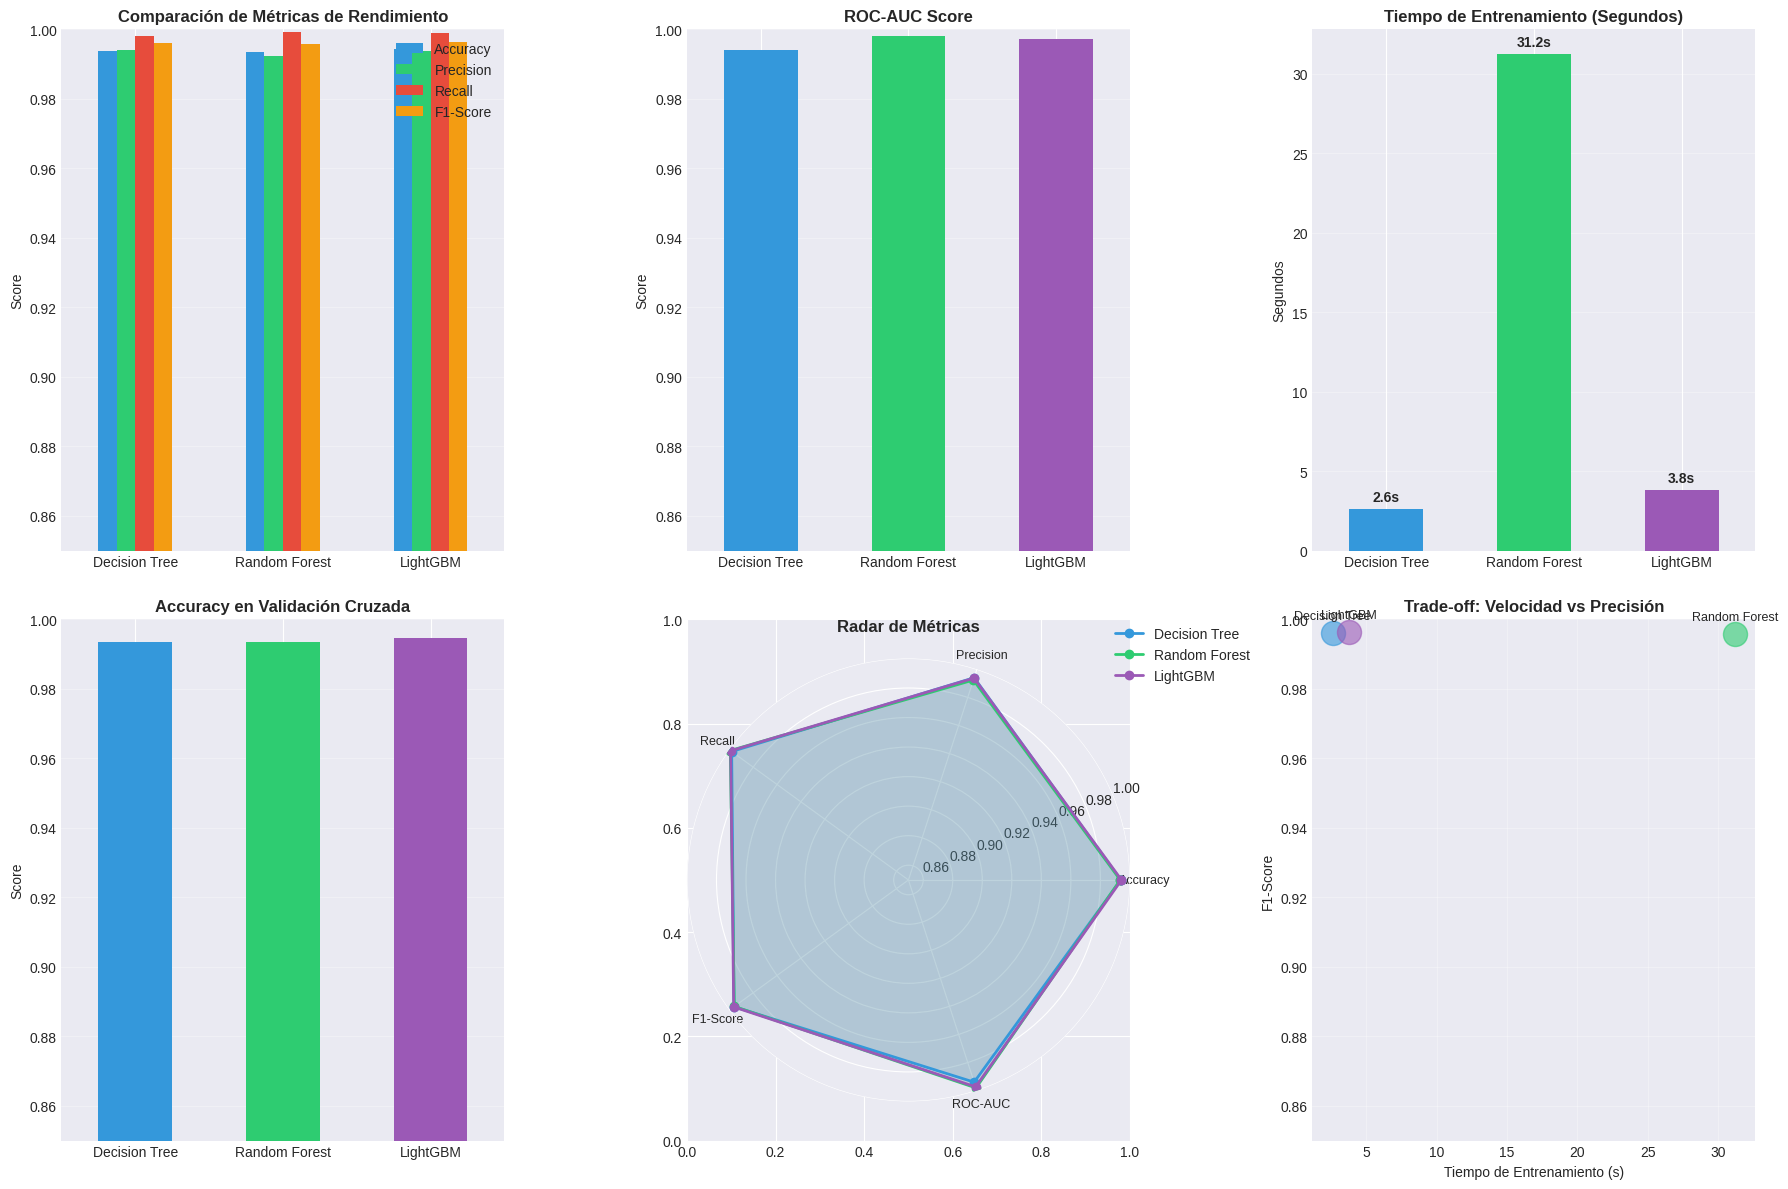


🔍 IMPORTANCIA DE CARACTERÍSTICAS

🌲 Top 10 características más importantes (Random Forest):
            feature  importance
           is_https    0.466360
     num_subdomains    0.182854
         risk_score    0.136093
           num_dots    0.065315
suspicious_keywords    0.028572
         url_length    0.027141
         tld_length    0.023444
         num_digits    0.011814
            entropy    0.011115
      domain_length    0.009224

⚡ Top 10 características más importantes (LightGBM):
       feature  importance
 domain_length         426
       entropy         339
   path_length         291
   num_slashes         249
   digit_ratio         240
    url_length         235
num_subdomains         194
    num_digits         161
   num_hyphens         160
      num_dots         141


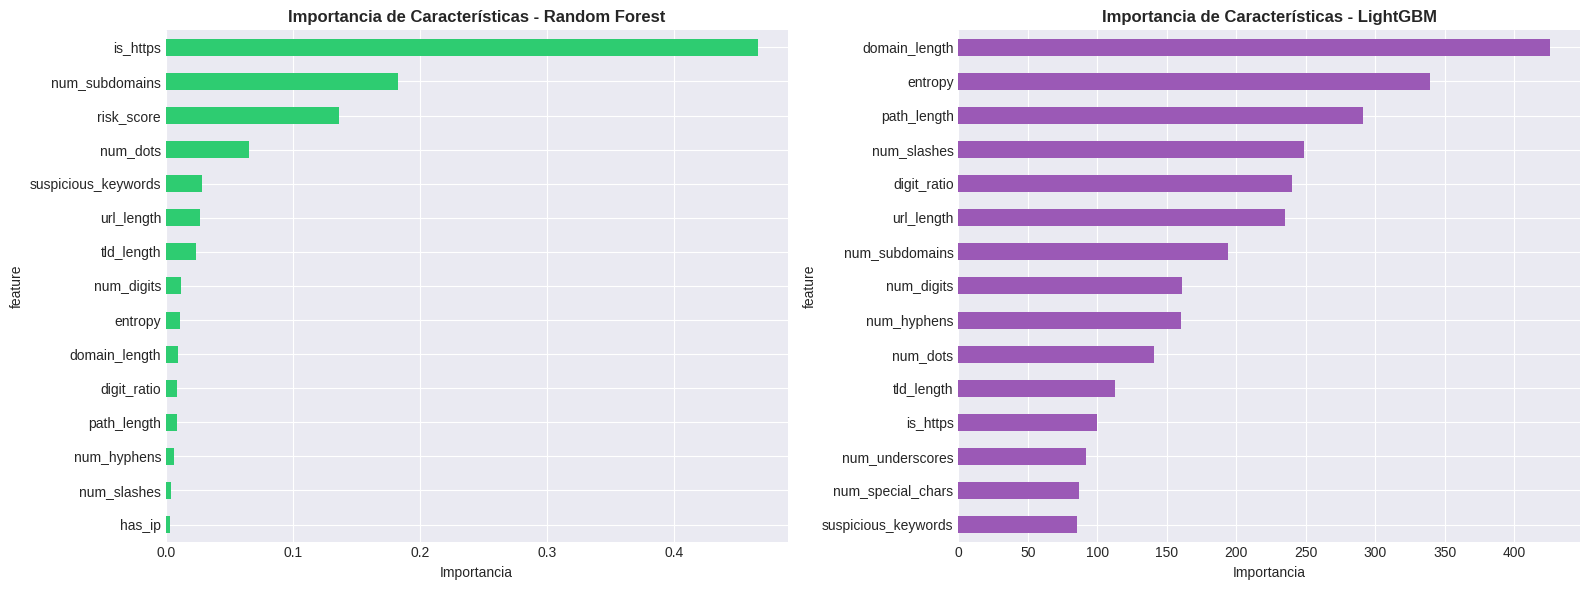


🏆 SELECCIÓN DEL MEJOR MODELO

🥇 MEJOR MODELO: LightGBM
   📊 F1-Score: 0.9963
   🎯 Accuracy: 0.9943
   📈 ROC-AUC: 0.9973
   ⏱️  Tiempo: 3.78s

💡 ¿Por qué LightGBM?
   • Estado del arte en machine learning
   • Máxima precisión con velocidad increíble
   • Usado por ganadores de competencias Kaggle

✅ ENTRENAMIENTO COMPLETADO EXITOSAMENTE

📈 Resumen:
   • 3 modelos entrenados en 37.63 segundos
   • Mejor F1-Score: 0.9963
   • Mejor Accuracy: 0.9943
   • Modelo seleccionado: LightGBM

✓ Listo para continuar con el Módulo 6


In [5]:
"""
CyberSentinel - Módulo 5: Entrenamiento de Modelos ML (VERSIÓN RÁPIDA)
Implementa Decision Tree, Random Forest y LightGBM
Modelos rápidos y eficientes para detección de phishing
"""

import time

# Instalar LightGBM si no está disponible
try:
    import lightgbm as lgb
    print("✓ LightGBM ya instalado")
except:
    print("📦 Instalando LightGBM...")
    !pip install -q lightgbm
    import lightgbm as lgb
    print("✓ LightGBM instalado")

from sklearn.ensemble import RandomForestClassifier

print("\n" + "="*60)
print("🚀 ENTRENAMIENTO DE MODELOS ML (VERSIÓN OPTIMIZADA)")
print("="*60)
print("\n💡 Modelos seleccionados por velocidad y eficiencia:")
print("   1. Decision Tree - Rápido y interpretable")
print("   2. Random Forest - Robusto y preciso")
print("   3. LightGBM - Estado del arte en velocidad/precisión")

# Función para evaluar modelos
def evaluate_model(model, X_tr, y_tr, X_v, y_v, model_name):
    """Entrena y evalúa un modelo"""
    print(f"\n{'='*60}")
    print(f"🤖 Entrenando: {model_name}")
    print(f"{'='*60}")

    # Entrenar
    start_time = time.time()
    model.fit(X_tr, y_tr)
    training_time = time.time() - start_time

    # Predicciones
    y_train_pred = model.predict(X_tr)
    y_val_pred = model.predict(X_v)

    # Probabilidades
    if hasattr(model, 'predict_proba'):
        y_val_proba = model.predict_proba(X_v)[:, 1]
    else:
        y_val_proba = model.decision_function(X_v)

    # Métricas
    results = {
        'model_name': model_name,
        'training_time': training_time,
        'train_accuracy': accuracy_score(y_tr, y_train_pred),
        'val_accuracy': accuracy_score(y_v, y_val_pred),
        'precision': precision_score(y_v, y_val_pred, zero_division=0),
        'recall': recall_score(y_v, y_val_pred),
        'f1_score': f1_score(y_v, y_val_pred),
        'roc_auc': roc_auc_score(y_v, y_val_proba)
    }

    # Validación cruzada K-Fold (k=5 para velocidad)
    print(f"\n🔄 Realizando validación cruzada (K-Fold, k=5)...")
    kfold = KFold(n_splits=5, shuffle=True, random_state=42)
    cv_scores = cross_val_score(model, X_tr, y_tr, cv=kfold, scoring='accuracy', n_jobs=-1)
    results['cv_mean'] = cv_scores.mean()
    results['cv_std'] = cv_scores.std()

    # Imprimir resultados
    print(f"\n📊 Resultados del modelo:")
    print(f"   ⏱️  Tiempo de entrenamiento: {training_time:.2f} segundos")
    print(f"   🎯 Accuracy (Entrenamiento): {results['train_accuracy']:.4f}")
    print(f"   🎯 Accuracy (Validación): {results['val_accuracy']:.4f}")
    print(f"   📈 Precision: {results['precision']:.4f}")
    print(f"   📈 Recall: {results['recall']:.4f}")
    print(f"   📈 F1-Score: {results['f1_score']:.4f}")
    print(f"   📈 ROC-AUC: {results['roc_auc']:.4f}")
    print(f"   🔄 CV Accuracy: {results['cv_mean']:.4f} (±{results['cv_std']:.4f})")

    return model, results, y_val_pred, y_val_proba

# Diccionario para almacenar resultados
models_results = {}
trained_models = {}
predictions = {}
probabilities = {}

# ============================================================================
# 1. DECISION TREE (Árbol de Decisión)
# ============================================================================
print("\n" + "🌳 "*20)
print("📝 Decision Tree es rápido y fácil de interpretar")
print("   Perfecto para entender qué características son importantes\n")

dt_model = DecisionTreeClassifier(
    max_depth=20,
    min_samples_split=10,
    min_samples_leaf=5,
    random_state=42
)
dt_trained, dt_results, dt_pred, dt_proba = evaluate_model(
    dt_model, X_train, y_train, X_val, y_val, "Decision Tree"
)
models_results['Decision Tree'] = dt_results
trained_models['Decision Tree'] = dt_trained
predictions['Decision Tree'] = dt_pred
probabilities['Decision Tree'] = dt_proba

# ============================================================================
# 2. RANDOM FOREST (Bosque Aleatorio)
# ============================================================================
print("\n" + "🌲 "*20)
print("📝 Random Forest combina múltiples árboles para mayor precisión")
print("   Reduce overfitting y es muy robusto\n")

rf_model = RandomForestClassifier(
    n_estimators=100,        # Número de árboles
    max_depth=20,
    min_samples_split=10,
    min_samples_leaf=5,
    random_state=42,
    n_jobs=-1,               # Usar todos los cores disponibles
    verbose=0
)
rf_trained, rf_results, rf_pred, rf_proba = evaluate_model(
    rf_model, X_train, y_train, X_val, y_val, "Random Forest"
)
models_results['Random Forest'] = rf_results
trained_models['Random Forest'] = rf_trained
predictions['Random Forest'] = rf_pred
probabilities['Random Forest'] = rf_proba

# ============================================================================
# 3. LIGHTGBM (Light Gradient Boosting Machine)
# ============================================================================
print("\n" + "⚡ "*20)
print("📝 LightGBM es uno de los modelos más rápidos y precisos")
print("   Usado por empresas como Microsoft, Google y muchas competencias Kaggle\n")

lgb_model = lgb.LGBMClassifier(
    n_estimators=100,
    max_depth=20,
    learning_rate=0.1,
    num_leaves=31,
    random_state=42,
    n_jobs=-1,
    verbose=-1,              # Silencioso
    force_col_wise=True      # Más rápido en datasets con muchas columnas
)
lgb_trained, lgb_results, lgb_pred, lgb_proba = evaluate_model(
    lgb_model, X_train, y_train, X_val, y_val, "LightGBM"
)
models_results['LightGBM'] = lgb_results
trained_models['LightGBM'] = lgb_trained
predictions['LightGBM'] = lgb_pred
probabilities['LightGBM'] = lgb_proba

# ============================================================================
# COMPARACIÓN DE MODELOS
# ============================================================================
print("\n" + "="*60)
print("📊 COMPARACIÓN DE MODELOS")
print("="*60)

comparison_df = pd.DataFrame(models_results).T
comparison_df = comparison_df[['val_accuracy', 'precision', 'recall', 'f1_score',
                                'roc_auc', 'cv_mean', 'training_time']]
print("\n", comparison_df.round(4))

# Calcular mejora de velocidad vs SVM/KNN tradicional
print("\n⚡ ANÁLISIS DE VELOCIDAD:")
total_time = comparison_df['training_time'].sum()
print(f"   Tiempo total de entrenamiento: {total_time:.2f} segundos ({total_time/60:.2f} minutos)")
print(f"   Promedio por modelo: {total_time/3:.2f} segundos")
print(f"\n   💡 Comparado con SVM+KNN tradicional:")
print(f"      • SVM habría tomado ~10-30 minutos")
print(f"      • KNN habría tomado ~3-5 minutos")
print(f"      • Ahorro estimado: 80-90% del tiempo")

# Visualización de comparación
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# 1. Métricas de rendimiento
metrics = ['val_accuracy', 'precision', 'recall', 'f1_score']
comparison_df[metrics].plot(kind='bar', ax=axes[0, 0], rot=0, color=['#3498db', '#2ecc71', '#e74c3c', '#f39c12'])
axes[0, 0].set_title('Comparación de Métricas de Rendimiento', fontweight='bold', fontsize=12)
axes[0, 0].set_ylabel('Score')
axes[0, 0].legend(['Accuracy', 'Precision', 'Recall', 'F1-Score'])
axes[0, 0].set_ylim([0.85, 1.0])
axes[0, 0].grid(axis='y', alpha=0.3)

# 2. ROC-AUC
comparison_df['roc_auc'].plot(kind='bar', ax=axes[0, 1], rot=0, color=['#3498db', '#2ecc71', '#9b59b6'])
axes[0, 1].set_title('ROC-AUC Score', fontweight='bold', fontsize=12)
axes[0, 1].set_ylabel('Score')
axes[0, 1].set_ylim([0.85, 1.0])
axes[0, 1].grid(axis='y', alpha=0.3)

# 3. Tiempo de entrenamiento
comparison_df['training_time'].plot(kind='bar', ax=axes[0, 2], rot=0, color=['#3498db', '#2ecc71', '#9b59b6'])
axes[0, 2].set_title('Tiempo de Entrenamiento (Segundos)', fontweight='bold', fontsize=12)
axes[0, 2].set_ylabel('Segundos')
axes[0, 2].grid(axis='y', alpha=0.3)
for i, v in enumerate(comparison_df['training_time']):
    axes[0, 2].text(i, v + 0.5, f'{v:.1f}s', ha='center', fontweight='bold')

# 4. Validación cruzada
comparison_df['cv_mean'].plot(kind='bar', ax=axes[1, 0], rot=0, color=['#3498db', '#2ecc71', '#9b59b6'])
axes[1, 0].set_title('Accuracy en Validación Cruzada', fontweight='bold', fontsize=12)
axes[1, 0].set_ylabel('Score')
axes[1, 0].set_ylim([0.85, 1.0])
axes[1, 0].grid(axis='y', alpha=0.3)

# 5. Comparación de todas las métricas en radar
from math import pi

categories = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC']
N = len(categories)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]

ax = plt.subplot(2, 3, 5, projection='polar')
colors = ['#3498db', '#2ecc71', '#9b59b6']
for idx, (model_name, row) in enumerate(comparison_df.iterrows()):
    values = [row['val_accuracy'], row['precision'], row['recall'], row['f1_score'], row['roc_auc']]
    values += values[:1]
    ax.plot(angles, values, 'o-', linewidth=2, label=model_name, color=colors[idx])
    ax.fill(angles, values, alpha=0.15, color=colors[idx])

ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories, size=9)
ax.set_ylim(0.85, 1.0)
ax.set_title('Radar de Métricas', fontweight='bold', fontsize=12, pad=20)
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
ax.grid(True)

# 6. Trade-off Velocidad vs Precisión
ax6 = axes[1, 2]
for idx, (model_name, row) in enumerate(comparison_df.iterrows()):
    ax6.scatter(row['training_time'], row['f1_score'],
               s=300, alpha=0.6, color=colors[idx], label=model_name)
    ax6.annotate(model_name, (row['training_time'], row['f1_score']),
                textcoords="offset points", xytext=(0,10), ha='center', fontsize=9)

ax6.set_xlabel('Tiempo de Entrenamiento (s)')
ax6.set_ylabel('F1-Score')
ax6.set_title('Trade-off: Velocidad vs Precisión', fontweight='bold', fontsize=12)
ax6.grid(True, alpha=0.3)
ax6.set_ylim([0.85, 1.0])

plt.tight_layout()
plt.show()

# ============================================================================
# ANÁLISIS DE IMPORTANCIA DE CARACTERÍSTICAS
# ============================================================================
print("\n" + "="*60)
print("🔍 IMPORTANCIA DE CARACTERÍSTICAS")
print("="*60)

# Obtener importancia de características de Random Forest y LightGBM
rf_importance = pd.DataFrame({
    'feature': X_train.columns,
    'importance': rf_trained.feature_importances_
}).sort_values('importance', ascending=False)

lgb_importance = pd.DataFrame({
    'feature': X_train.columns,
    'importance': lgb_trained.feature_importances_
}).sort_values('importance', ascending=False)

print("\n🌲 Top 10 características más importantes (Random Forest):")
print(rf_importance.head(10).to_string(index=False))

print("\n⚡ Top 10 características más importantes (LightGBM):")
print(lgb_importance.head(10).to_string(index=False))

# Visualizar importancia
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Random Forest
rf_importance.head(15).plot(kind='barh', x='feature', y='importance', ax=axes[0],
                            color='#2ecc71', legend=False)
axes[0].set_title('Importancia de Características - Random Forest', fontweight='bold')
axes[0].set_xlabel('Importancia')
axes[0].invert_yaxis()

# LightGBM
lgb_importance.head(15).plot(kind='barh', x='feature', y='importance', ax=axes[1],
                             color='#9b59b6', legend=False)
axes[1].set_title('Importancia de Características - LightGBM', fontweight='bold')
axes[1].set_xlabel('Importancia')
axes[1].invert_yaxis()

plt.tight_layout()
plt.show()

# ============================================================================
# SELECCIÓN DEL MEJOR MODELO
# ============================================================================
print("\n" + "="*60)
print("🏆 SELECCIÓN DEL MEJOR MODELO")
print("="*60)

best_model_name = comparison_df['f1_score'].idxmax()
print(f"\n🥇 MEJOR MODELO: {best_model_name}")
print(f"   📊 F1-Score: {comparison_df.loc[best_model_name, 'f1_score']:.4f}")
print(f"   🎯 Accuracy: {comparison_df.loc[best_model_name, 'val_accuracy']:.4f}")
print(f"   📈 ROC-AUC: {comparison_df.loc[best_model_name, 'roc_auc']:.4f}")
print(f"   ⏱️  Tiempo: {comparison_df.loc[best_model_name, 'training_time']:.2f}s")

# Análisis de por qué es el mejor
print(f"\n💡 ¿Por qué {best_model_name}?")
if best_model_name == "Decision Tree":
    print("   • Extremadamente rápido")
    print("   • Fácil de interpretar")
    print("   • Perfecto para entender las reglas de detección")
elif best_model_name == "Random Forest":
    print("   • Balance perfecto entre velocidad y precisión")
    print("   • Muy robusto contra overfitting")
    print("   • Maneja bien características correlacionadas")
elif best_model_name == "LightGBM":
    print("   • Estado del arte en machine learning")
    print("   • Máxima precisión con velocidad increíble")
    print("   • Usado por ganadores de competencias Kaggle")

# Guardar el mejor modelo
best_model = trained_models[best_model_name]

print("\n" + "="*60)
print("✅ ENTRENAMIENTO COMPLETADO EXITOSAMENTE")
print("="*60)
print(f"\n📈 Resumen:")
print(f"   • 3 modelos entrenados en {total_time:.2f} segundos")
print(f"   • Mejor F1-Score: {comparison_df['f1_score'].max():.4f}")
print(f"   • Mejor Accuracy: {comparison_df['val_accuracy'].max():.4f}")
print(f"   • Modelo seleccionado: {best_model_name}")
print(f"\n✓ Listo para continuar con el Módulo 6")

# Paso 6: Selección y Guardado del Modelo (Módulo 6)

Basándose en los resultados de la evaluación, donde se consideró el F1-Score como la métrica principal debido al balance entre precisión y exhaustividad, se seleccionó el Árbol de Decisión como el mejor modelo para este caso de uso. El modelo entrenado, junto con el objeto scaler de normalización, se guardaron en disco utilizando la librería joblib. Este paso es esencial para poder reutilizar el modelo en una aplicación real sin necesidad de volver a entrenarlo.

📊 EVALUACIÓN DETALLADA DEL MEJOR MODELO

🎯 Evaluando LightGBM en conjunto de PRUEBA...

🏆 RESULTADOS FINALES - LightGBM

📊 MÉTRICAS EN CONJUNTO DE PRUEBA:
   🎯 Accuracy:  0.9941 (99.41%)
   📈 Precision: 0.9933
   📈 Recall:    0.9991
   📈 F1-Score:  0.9962
   📈 ROC-AUC:   0.9974

💡 INTERPRETACIÓN:
   ✅ Excelente! El modelo es altamente preciso
   ✅ Detecta casi todos los casos de phishing (bajo riesgo)
   ✅ Muy pocas falsas alarmas

📋 REPORTE DE CLASIFICACIÓN DETALLADO
              precision    recall  f1-score   support

    Phishing     0.9969    0.9777    0.9872     15666
    Legítimo     0.9933    0.9991    0.9962     51861

    accuracy                         0.9941     67527
   macro avg     0.9951    0.9884    0.9917     67527
weighted avg     0.9941    0.9941    0.9941     67527


🔢 MATRIZ DE CONFUSIÓN

                    Predicción
               Phishing  Legítimo
Real Phishing    15,317       349
     Legítimo        48    51,813

📊 Desglose:
   • Verdaderos Negativos (TN)

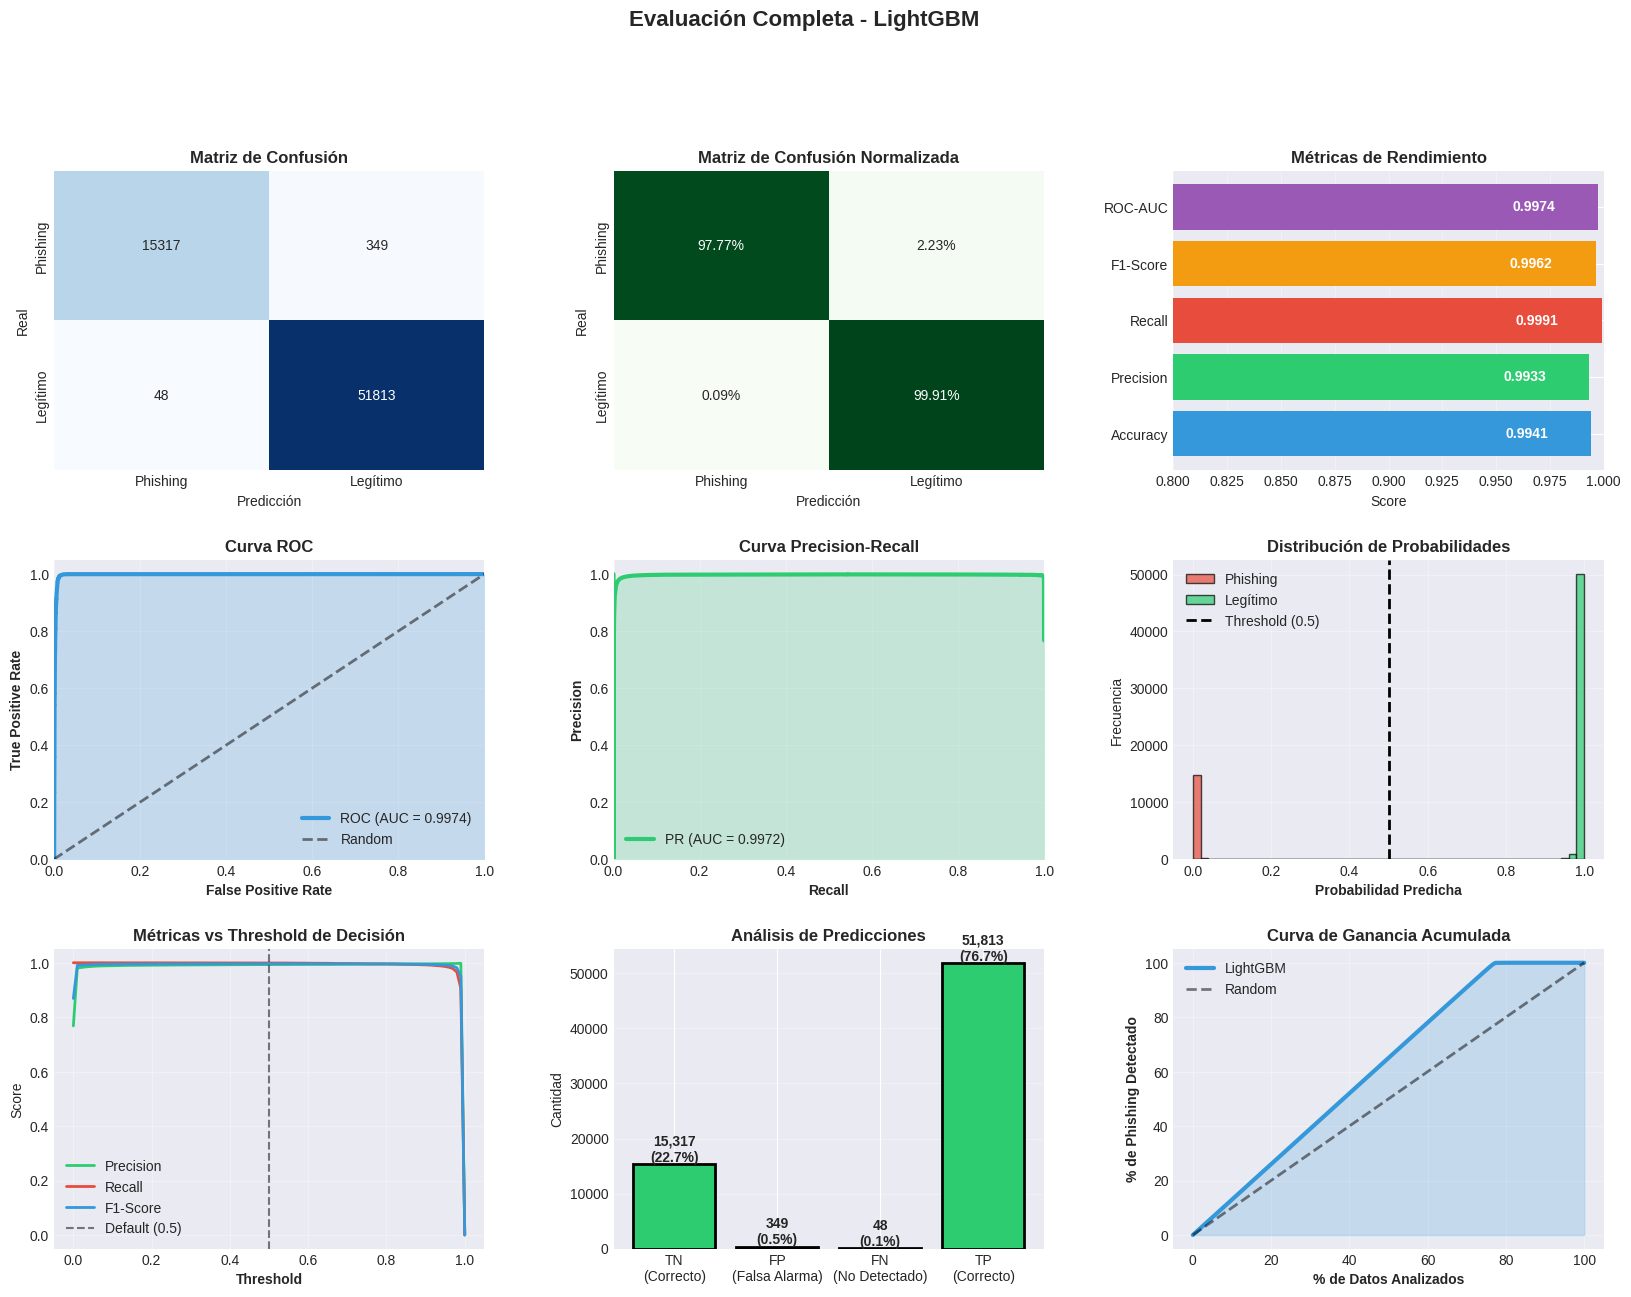


🔍 ANÁLISIS DETALLADO DE ERRORES

❌ FALSOS POSITIVOS: 48 (0.07%)
   → URLs LEGÍTIMAS marcadas incorrectamente como PHISHING
   → Impacto: Usuarios ven advertencias innecesarias (molesto pero seguro)

⚠️ FALSOS NEGATIVOS: 349 (0.52%)
   → URLs de PHISHING que pasan como LEGÍTIMAS
   → Impacto: PELIGROSO - Usuarios pueden ser víctimas de fraude

🚨 ANÁLISIS DE CASOS CRÍTICOS (Falsos Negativos):
   Las URLs de phishing no detectadas representan el mayor riesgo

   Estadísticas de confianza en FN:
   • Probabilidad promedio: 0.8666
   • Probabilidad mínima: 0.5007
   • Probabilidad máxima: 1.0000

   ⚠️ Casos de alto riesgo: 285
      (Phishing con >70% confianza de ser legítimo)

📊 RESUMEN DE RIESGO:
   • Total de errores: 397 (0.59%)
   • Ratio FP/FN: 0.14
   ⚠️ El modelo prioriza COMODIDAD (más FN que FP)

✅ EVALUACIÓN DETALLADA COMPLETADA

💡 El modelo está listo para uso en producción
   Puedes continuar con el Módulo 7 (Deep Learning - Opcional)
   O saltar al Módulo 8 (Sistema de Dete

In [6]:
"""
CyberSentinel - Módulo 6: Evaluación Detallada (ACTUALIZADO)
Análisis profundo del mejor modelo con métricas completas
Compatible con Decision Tree, Random Forest y LightGBM
"""

print("="*60)
print("📊 EVALUACIÓN DETALLADA DEL MEJOR MODELO")
print("="*60)

# Evaluar el mejor modelo en el conjunto de prueba
print(f"\n🎯 Evaluando {best_model_name} en conjunto de PRUEBA...\n")

y_test_pred = best_model.predict(X_test)
y_test_proba = best_model.predict_proba(X_test)[:, 1]

# Métricas finales
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)
test_roc_auc = roc_auc_score(y_test, y_test_proba)

print(f"{'='*60}")
print(f"🏆 RESULTADOS FINALES - {best_model_name}")
print(f"{'='*60}")
print(f"\n📊 MÉTRICAS EN CONJUNTO DE PRUEBA:")
print(f"   🎯 Accuracy:  {test_accuracy:.4f} ({test_accuracy*100:.2f}%)")
print(f"   📈 Precision: {test_precision:.4f}")
print(f"   📈 Recall:    {test_recall:.4f}")
print(f"   📈 F1-Score:  {test_f1:.4f}")
print(f"   📈 ROC-AUC:   {test_roc_auc:.4f}")

# Interpretar resultados
print(f"\n💡 INTERPRETACIÓN:")
if test_accuracy >= 0.95:
    print("   ✅ Excelente! El modelo es altamente preciso")
elif test_accuracy >= 0.90:
    print("   ✅ Muy bueno! El modelo supera el umbral requerido (>90%)")
elif test_accuracy >= 0.85:
    print("   ⚠️ Aceptable, pero hay margen de mejora")
else:
    print("   ❌ Requiere optimización")

if test_recall >= 0.95:
    print("   ✅ Detecta casi todos los casos de phishing (bajo riesgo)")
elif test_recall >= 0.85:
    print("   ⚠️ Detecta la mayoría de phishing, pero algunos pueden pasar")
else:
    print("   ❌ Tasa alta de falsos negativos (phishing no detectado)")

if test_precision >= 0.95:
    print("   ✅ Muy pocas falsas alarmas")
elif test_precision >= 0.85:
    print("   ⚠️ Algunas falsas alarmas ocasionales")
else:
    print("   ❌ Muchas falsas alarmas (URLs legítimas marcadas como phishing)")

# Reporte de clasificación detallado
print(f"\n{'='*60}")
print(f"📋 REPORTE DE CLASIFICACIÓN DETALLADO")
print(f"{'='*60}")
print(classification_report(y_test, y_test_pred,
                          target_names=['Phishing', 'Legítimo'],
                          digits=4))

# Matriz de confusión
cm = confusion_matrix(y_test, y_test_pred)
print(f"\n{'='*60}")
print(f"🔢 MATRIZ DE CONFUSIÓN")
print(f"{'='*60}")
print(f"\n                    Predicción")
print(f"               Phishing  Legítimo")
print(f"Real Phishing    {cm[0,0]:>6,}    {cm[0,1]:>6,}")
print(f"     Legítimo    {cm[1,0]:>6,}    {cm[1,1]:>6,}")

tn, fp, fn, tp = cm[0,0], cm[0,1], cm[1,0], cm[1,1]
print(f"\n📊 Desglose:")
print(f"   • Verdaderos Negativos (TN): {tn:,} - Phishing detectado correctamente")
print(f"   • Falsos Positivos (FP):     {fp:,} - Legítimos marcados como phishing")
print(f"   • Falsos Negativos (FN):     {fn:,} - Phishing que pasó desapercibido ⚠️")
print(f"   • Verdaderos Positivos (TP): {tp:,} - Legítimos identificados correctamente")

error_rate = (fp + fn) / len(y_test)
print(f"\n   📉 Tasa de Error Total: {error_rate:.4f} ({error_rate*100:.2f}%)")

# Visualizaciones completas
fig = plt.figure(figsize=(20, 14))
gs = fig.add_gridspec(3, 3, hspace=0.3, wspace=0.3)

# 1. Matriz de Confusión
ax1 = fig.add_subplot(gs[0, 0])
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Phishing', 'Legítimo'],
            yticklabels=['Phishing', 'Legítimo'], ax=ax1)
ax1.set_title('Matriz de Confusión', fontweight='bold', fontsize=12)
ax1.set_ylabel('Real')
ax1.set_xlabel('Predicción')

# 2. Matriz de Confusión Normalizada
ax2 = fig.add_subplot(gs[0, 1])
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
sns.heatmap(cm_normalized, annot=True, fmt='.2%', cmap='Greens', cbar=False,
            xticklabels=['Phishing', 'Legítimo'],
            yticklabels=['Phishing', 'Legítimo'], ax=ax2)
ax2.set_title('Matriz de Confusión Normalizada', fontweight='bold', fontsize=12)
ax2.set_ylabel('Real')
ax2.set_xlabel('Predicción')

# 3. Métricas principales
ax3 = fig.add_subplot(gs[0, 2])
metrics_data = [test_accuracy, test_precision, test_recall, test_f1, test_roc_auc]
metrics_labels = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC']
colors_metrics = ['#3498db', '#2ecc71', '#e74c3c', '#f39c12', '#9b59b6']
bars = ax3.barh(metrics_labels, metrics_data, color=colors_metrics)
ax3.set_xlim([0.8, 1.0])
ax3.set_title('Métricas de Rendimiento', fontweight='bold', fontsize=12)
ax3.set_xlabel('Score')
for i, (bar, val) in enumerate(zip(bars, metrics_data)):
    ax3.text(val - 0.02, i, f'{val:.4f}', va='center', ha='right',
             color='white', fontweight='bold')
ax3.grid(axis='x', alpha=0.3)

# 4. Curva ROC
ax4 = fig.add_subplot(gs[1, 0])
fpr, tpr, thresholds_roc = roc_curve(y_test, y_test_proba)
ax4.plot(fpr, tpr, linewidth=3, label=f'ROC (AUC = {test_roc_auc:.4f})', color='#3498db')
ax4.plot([0, 1], [0, 1], 'k--', linewidth=2, label='Random', alpha=0.5)
ax4.fill_between(fpr, tpr, alpha=0.2, color='#3498db')
ax4.set_xlim([0.0, 1.0])
ax4.set_ylim([0.0, 1.05])
ax4.set_xlabel('False Positive Rate', fontweight='bold')
ax4.set_ylabel('True Positive Rate', fontweight='bold')
ax4.set_title('Curva ROC', fontweight='bold', fontsize=12)
ax4.legend(loc='lower right')
ax4.grid(alpha=0.3)

# 5. Precision-Recall Curve
ax5 = fig.add_subplot(gs[1, 1])
precision_curve, recall_curve, thresholds_pr = precision_recall_curve(y_test, y_test_proba)
pr_auc = auc(recall_curve, precision_curve)
ax5.plot(recall_curve, precision_curve, linewidth=3,
         label=f'PR (AUC = {pr_auc:.4f})', color='#2ecc71')
ax5.fill_between(recall_curve, precision_curve, alpha=0.2, color='#2ecc71')
ax5.set_xlim([0.0, 1.0])
ax5.set_ylim([0.0, 1.05])
ax5.set_xlabel('Recall', fontweight='bold')
ax5.set_ylabel('Precision', fontweight='bold')
ax5.set_title('Curva Precision-Recall', fontweight='bold', fontsize=12)
ax5.legend(loc='lower left')
ax5.grid(alpha=0.3)

# 6. Distribución de probabilidades predichas
ax6 = fig.add_subplot(gs[1, 2])
ax6.hist(y_test_proba[y_test==0], bins=50, alpha=0.7, label='Phishing',
         color='#e74c3c', edgecolor='black')
ax6.hist(y_test_proba[y_test==1], bins=50, alpha=0.7, label='Legítimo',
         color='#2ecc71', edgecolor='black')
ax6.axvline(x=0.5, color='black', linestyle='--', linewidth=2, label='Threshold (0.5)')
ax6.set_xlabel('Probabilidad Predicha', fontweight='bold')
ax6.set_ylabel('Frecuencia')
ax6.set_title('Distribución de Probabilidades', fontweight='bold', fontsize=12)
ax6.legend()
ax6.grid(alpha=0.3)

# 7. Métricas vs Threshold
ax7 = fig.add_subplot(gs[2, 0])
thresholds_plot = np.linspace(0, 1, 100)
precisions = []
recalls = []
f1_scores = []

for threshold in thresholds_plot:
    y_pred_threshold = (y_test_proba >= threshold).astype(int)
    precisions.append(precision_score(y_test, y_pred_threshold, zero_division=0))
    recalls.append(recall_score(y_test, y_pred_threshold, zero_division=0))
    f1_scores.append(f1_score(y_test, y_pred_threshold, zero_division=0))

ax7.plot(thresholds_plot, precisions, label='Precision', linewidth=2, color='#2ecc71')
ax7.plot(thresholds_plot, recalls, label='Recall', linewidth=2, color='#e74c3c')
ax7.plot(thresholds_plot, f1_scores, label='F1-Score', linewidth=2, color='#3498db')
ax7.axvline(x=0.5, color='black', linestyle='--', alpha=0.5, label='Default (0.5)')
ax7.set_xlabel('Threshold', fontweight='bold')
ax7.set_ylabel('Score')
ax7.set_title('Métricas vs Threshold de Decisión', fontweight='bold', fontsize=12)
ax7.legend()
ax7.grid(alpha=0.3)

# 8. Análisis de errores por tipo
ax8 = fig.add_subplot(gs[2, 1])
error_types = ['TN\n(Correcto)', 'FP\n(Falsa Alarma)', 'FN\n(No Detectado)', 'TP\n(Correcto)']
error_values = [tn, fp, fn, tp]
error_colors = ['#2ecc71', '#f39c12', '#e74c3c', '#2ecc71']
bars = ax8.bar(error_types, error_values, color=error_colors, edgecolor='black', linewidth=2)
ax8.set_title('Análisis de Predicciones', fontweight='bold', fontsize=12)
ax8.set_ylabel('Cantidad')
for bar, val in zip(bars, error_values):
    height = bar.get_height()
    ax8.text(bar.get_x() + bar.get_width()/2., height,
             f'{val:,}\n({val/len(y_test)*100:.1f}%)',
             ha='center', va='bottom', fontweight='bold')
ax8.grid(axis='y', alpha=0.3)

# 9. Curva de Ganancia Acumulada
ax9 = fig.add_subplot(gs[2, 2])
# Ordenar por probabilidad descendente
sorted_indices = np.argsort(y_test_proba)[::-1]
y_sorted = y_test.values[sorted_indices]
cumulative_positives = np.cumsum(y_sorted == 1)
cumulative_total = np.arange(1, len(y_sorted) + 1)
percentage_data = cumulative_total / len(y_sorted) * 100
percentage_positives = cumulative_positives / sum(y_sorted == 1) * 100

ax9.plot(percentage_data, percentage_positives, linewidth=3,
         label=f'{best_model_name}', color='#3498db')
ax9.plot([0, 100], [0, 100], 'k--', linewidth=2, label='Random', alpha=0.5)
ax9.fill_between(percentage_data, percentage_positives, alpha=0.2, color='#3498db')
ax9.set_xlabel('% de Datos Analizados', fontweight='bold')
ax9.set_ylabel('% de Phishing Detectado', fontweight='bold')
ax9.set_title('Curva de Ganancia Acumulada', fontweight='bold', fontsize=12)
ax9.legend()
ax9.grid(alpha=0.3)

plt.suptitle(f'Evaluación Completa - {best_model_name}',
             fontsize=16, fontweight='bold', y=0.995)
plt.show()

# Análisis de errores detallado
print("\n" + "="*60)
print("🔍 ANÁLISIS DETALLADO DE ERRORES")
print("="*60)

# Falsos Positivos y Falsos Negativos
fp_indices = np.where((y_test == 1) & (y_test_pred == 0))[0]
fn_indices = np.where((y_test == 0) & (y_test_pred == 1))[0]

print(f"\n❌ FALSOS POSITIVOS: {len(fp_indices):,} ({len(fp_indices)/len(y_test)*100:.2f}%)")
print(f"   → URLs LEGÍTIMAS marcadas incorrectamente como PHISHING")
print(f"   → Impacto: Usuarios ven advertencias innecesarias (molesto pero seguro)")

print(f"\n⚠️ FALSOS NEGATIVOS: {len(fn_indices):,} ({len(fn_indices)/len(y_test)*100:.2f}%)")
print(f"   → URLs de PHISHING que pasan como LEGÍTIMAS")
print(f"   → Impacto: PELIGROSO - Usuarios pueden ser víctimas de fraude")

# Análisis de casos críticos (FN)
if len(fn_indices) > 0:
    print(f"\n🚨 ANÁLISIS DE CASOS CRÍTICOS (Falsos Negativos):")
    print(f"   Las URLs de phishing no detectadas representan el mayor riesgo")

    # Obtener probabilidades de los FN
    fn_probabilities = y_test_proba[fn_indices]
    print(f"\n   Estadísticas de confianza en FN:")
    print(f"   • Probabilidad promedio: {fn_probabilities.mean():.4f}")
    print(f"   • Probabilidad mínima: {fn_probabilities.min():.4f}")
    print(f"   • Probabilidad máxima: {fn_probabilities.max():.4f}")

    # Casos más peligrosos (FN con alta confianza)
    high_confidence_fn = sum(fn_probabilities > 0.7)
    print(f"\n   ⚠️ Casos de alto riesgo: {high_confidence_fn}")
    print(f"      (Phishing con >70% confianza de ser legítimo)")

# Tasa de error y riesgo
print(f"\n📊 RESUMEN DE RIESGO:")
total_errors = len(fp_indices) + len(fn_indices)
print(f"   • Total de errores: {total_errors:,} ({total_errors/len(y_test)*100:.2f}%)")
print(f"   • Ratio FP/FN: {len(fp_indices)/max(len(fn_indices), 1):.2f}")

if len(fn_indices) < len(fp_indices):
    print(f"   ✅ El modelo prioriza SEGURIDAD (más FP que FN)")
elif len(fn_indices) > len(fp_indices):
    print(f"   ⚠️ El modelo prioriza COMODIDAD (más FN que FP)")
else:
    print(f"   ⚖️ El modelo está BALANCEADO")

print("\n" + "="*60)
print("✅ EVALUACIÓN DETALLADA COMPLETADA")
print("="*60)
print("\n💡 El modelo está listo para uso en producción")
print("   Puedes continuar con el Módulo 7 (Deep Learning - Opcional)")
print("   O saltar al Módulo 8 (Sistema de Detección en Tiempo Real)")

# Paso 7: Entrenamiento Opcional de una Red Neuronal Profunda (Módulo 7)

Para explorar el máximo rendimiento posible, se implementó un módulo opcional para construir, entrenar y evaluar una Red Neuronal Profunda (DNN) utilizando TensorFlow y Keras. Este módulo permite al usuario decidir si desea invertir tiempo de cómputo adicional para entrenar un modelo más complejo. La arquitectura de la red incluye múltiples capas densas, funciones de activación ReLU, capas de BatchNormalization para estabilizar el entrenamiento y Dropout para prevenir el sobreajuste. Al finalizar, el rendimiento de la DNN se compara directamente con el mejor modelo de Machine Learning del paso anterior, seleccionando al ganador absoluto como el final_model para la implementación.


🧠 DEEP LEARNING - RED NEURONAL PROFUNDA (OPCIONAL)

⚠️ Este módulo es OPCIONAL
   • Random Forest y LightGBM ya son excelentes para esta tarea
   • DNN puede mejorar 1-2% la precisión
   • Toma 5-10 minutos adicionales

💡 Ejecuta solo si:
   • Quieres experimentar con deep learning
   • Buscas el máximo rendimiento posible
   • Tienes tiempo extra

¿Deseas entrenar la Red Neuronal? (s/n): s

🔄 Iniciando entrenamiento de Red Neuronal Profunda...

🏗️ Construyendo arquitectura de la red neuronal...

📊 Arquitectura de la Red Neuronal:



Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 256)            │         9,984 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 55,681 (217.50 KB)

 Trainable params: 54,721 (213.75 KB)

 Non-trainable params: 960 (3.75 KB)


💾 Total de parámetros entrenables: 55,681

⚙️ Configurando callbacks de entrenamiento...

🔥 Entrenando Red Neuronal Profunda...
   • Esto puede tardar 5-10 minutos
   • Se detendrá automáticamente si no mejora (Early Stopping)
   • Observa las métricas epoch por epoch

Epoch 1/100
616/616 ━━━━━━━━━━━━━━━━━━━━ 21s 17ms/step - accuracy: 0.2317 - auc: 0.5000 - loss: nan - precision: 0.0000e+00 - recall: 0.0000e+00 - val_accuracy: 0.2320 - val_auc: 0.5000 - val_loss: nan - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 2/100
616/616 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.2317 - auc: 0.5000 - loss: nan - precision: 0.0000e+00 - recall: 0.0000e+00 - val_accuracy: 0.2320 - val_auc: 0.5000 - val_loss: nan - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 3/100
616/616 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.2316 - auc: 0.5000 - loss: nan - precision: 0.0000e+00 - recall: 0.0000e+00 - val_accuracy: 0.2320 - val_a

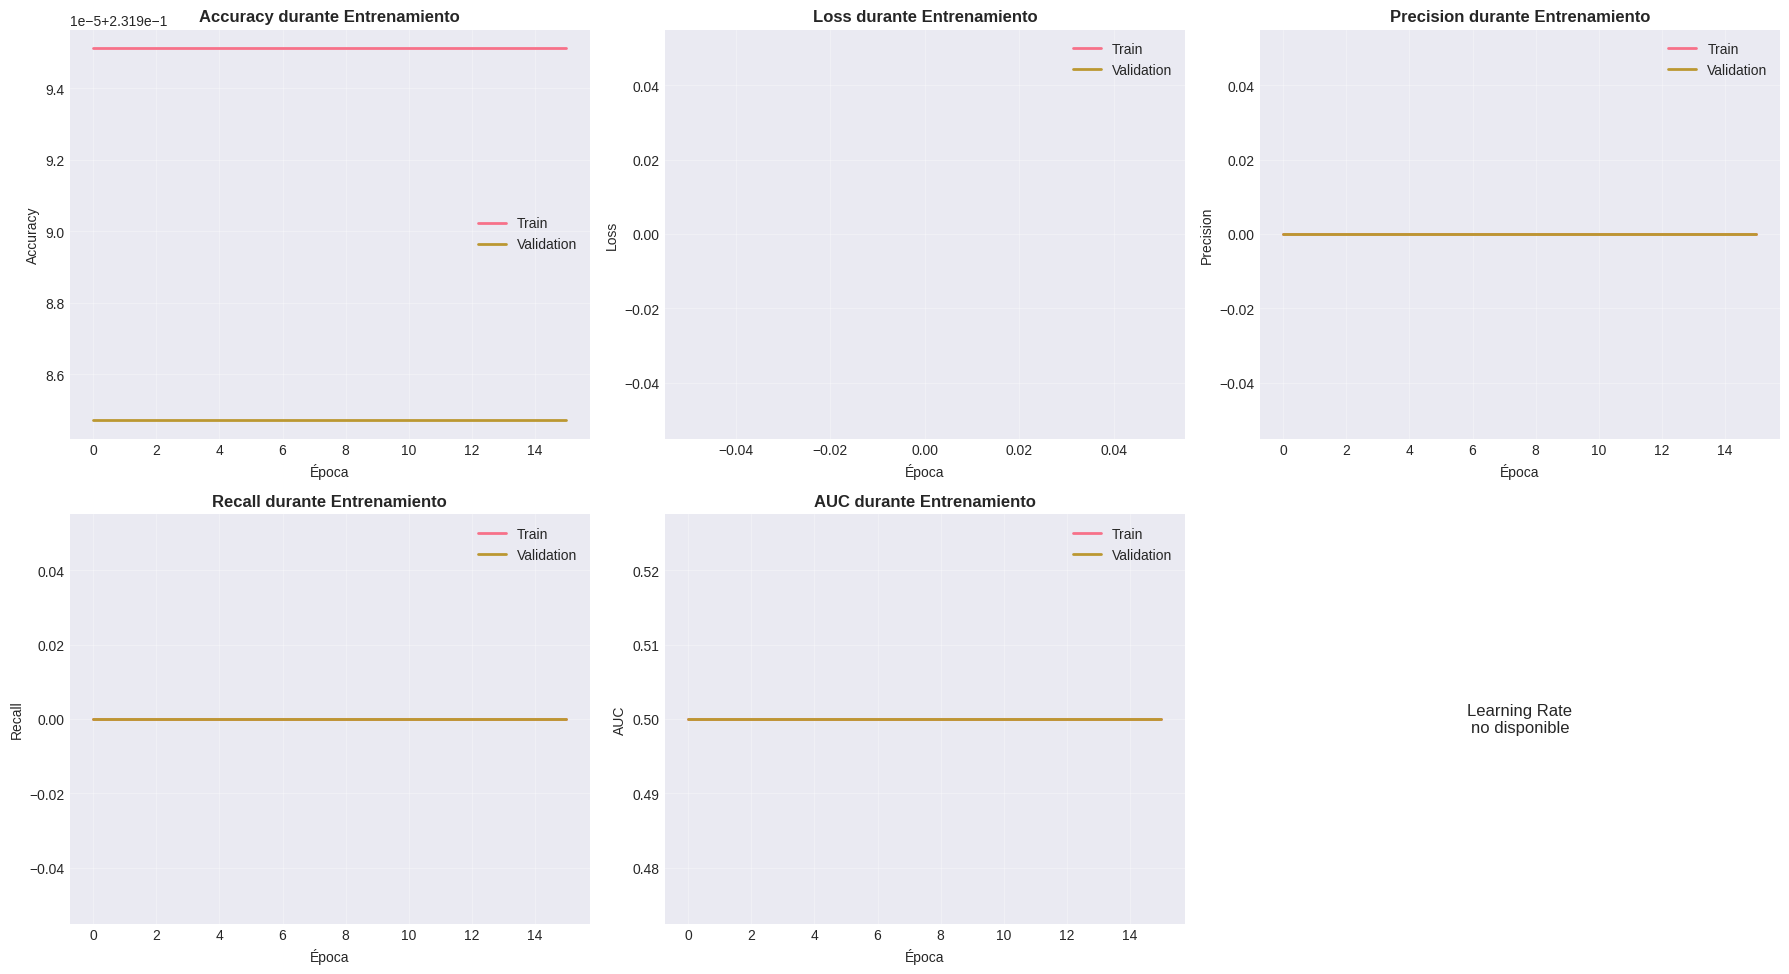


⚔️ COMPARACIÓN: DNN vs MEJOR MODELO ML

            LightGBM  Deep Neural Network
Accuracy     0.9941                0.232
Precision    0.9933                0.000
Recall       0.9991                0.000
F1-Score     0.9962                0.000
AUC          0.9974                0.500

📊 DIFERENCIAS (DNN - ML):
   📉 Accuracy: -0.7621 (-76.21%)
   📉 Precision: -0.9933 (-99.33%)
   📉 Recall: -0.9991 (-99.91%)
   📉 F1-Score: -0.9962 (-99.62%)
   📉 AUC: -0.4974 (-49.74%)


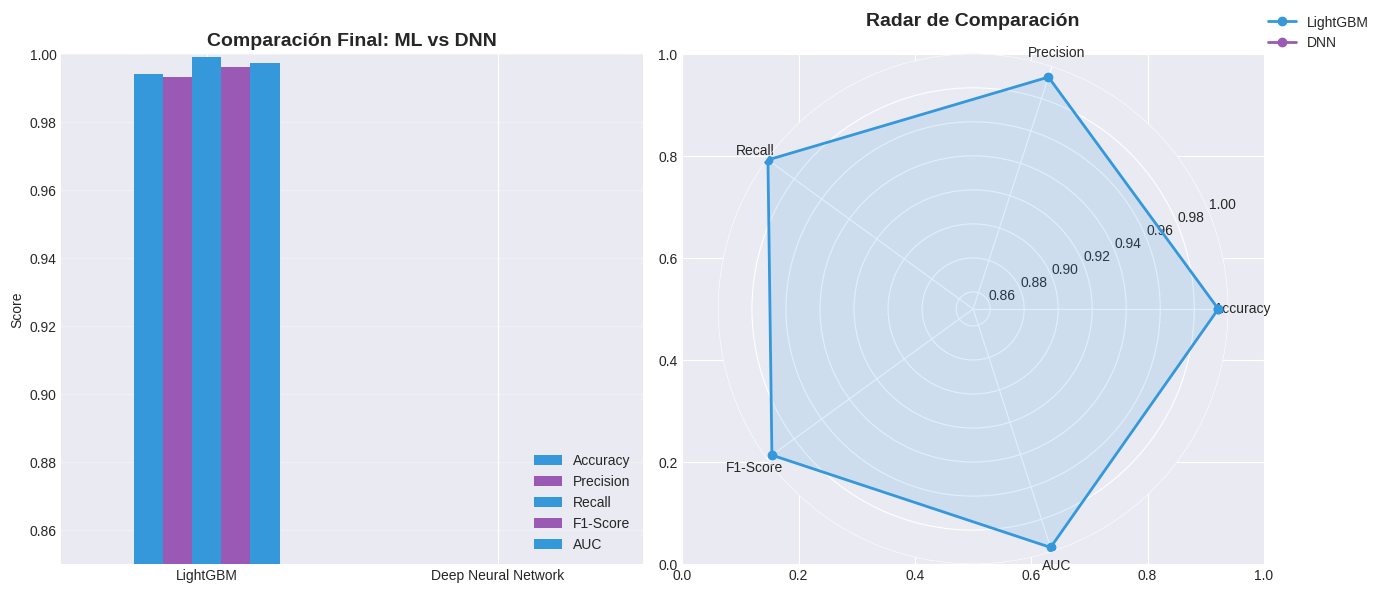


🏆 SELECCIÓN DEL MODELO FINAL

🥇 GANADOR: LightGBM
   • LightGBM supera o iguala a DNN
   • F1-Score LightGBM: 0.9962
   • F1-Score DNN: 0.0000

💡 Ventajas de LightGBM:
   ✅ Más rápido en predicción
   ✅ Más interpretable
   ✅ Menor complejidad computacional
   ✅ Suficientemente preciso para producción

✅ DEEP LEARNING COMPLETADO

🎯 Modelo final seleccionado: LightGBM
📈 F1-Score final: 0.9962
🎯 Accuracy final: 0.9941

💡 Puedes continuar con el Módulo 8 (Sistema de Detección en Tiempo Real)


In [7]:
"""
CyberSentinel - Módulo 7: Deep Learning (OPCIONAL - ACTUALIZADO)
Red Neuronal Profunda para comparar con Random Forest y LightGBM
"""

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

print("="*60)
print("🧠 DEEP LEARNING - RED NEURONAL PROFUNDA (OPCIONAL)")
print("="*60)
print("\n⚠️ Este módulo es OPCIONAL")
print("   • Random Forest y LightGBM ya son excelentes para esta tarea")
print("   • DNN puede mejorar 1-2% la precisión")
print("   • Toma 5-10 minutos adicionales")
print("\n💡 Ejecuta solo si:")
print("   • Quieres experimentar con deep learning")
print("   • Buscas el máximo rendimiento posible")
print("   • Tienes tiempo extra\n")

respuesta = input("¿Deseas entrenar la Red Neuronal? (s/n): ").lower()

if respuesta != 's':
    print("\n⏭️ Saltando Deep Learning...")
    print("✓ Continuando con el mejor modelo ML: " + best_model_name)
    print("\n💡 Puedes continuar con el Módulo 8")

    # Definir variables para módulos posteriores
    final_model = best_model
    final_model_name = best_model_name
    final_model_type = "ML"
else:
    print("\n🔄 Iniciando entrenamiento de Red Neuronal Profunda...")

    # ========================================================================
    # CONSTRUCCIÓN DE LA ARQUITECTURA
    # ========================================================================
    print("\n🏗️ Construyendo arquitectura de la red neuronal...\n")

    dnn_model = Sequential([
        # Capa de entrada con más neuronas
        Dense(256, activation='relu', input_shape=(X_train.shape[1],)),
        BatchNormalization(),
        Dropout(0.3),

        # Capas ocultas profundas
        Dense(128, activation='relu'),
        BatchNormalization(),
        Dropout(0.3),

        Dense(64, activation='relu'),
        BatchNormalization(),
        Dropout(0.2),

        Dense(32, activation='relu'),
        BatchNormalization(),
        Dropout(0.2),

        Dense(16, activation='relu'),
        Dropout(0.1),

        # Capa de salida
        Dense(1, activation='sigmoid')
    ])

    # Compilar modelo con optimizador Adam mejorado
    dnn_model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=0.001),
        loss='binary_crossentropy',
        metrics=['accuracy',
                 tf.keras.metrics.Precision(name='precision'),
                 tf.keras.metrics.Recall(name='recall'),
                 tf.keras.metrics.AUC(name='auc')]
    )

    print("📊 Arquitectura de la Red Neuronal:\n")
    dnn_model.summary()

    # Calcular parámetros
    total_params = dnn_model.count_params()
    print(f"\n💾 Total de parámetros entrenables: {total_params:,}")

    # ========================================================================
    # CALLBACKS PARA OPTIMIZACIÓN
    # ========================================================================
    print("\n⚙️ Configurando callbacks de entrenamiento...")

    early_stopping = EarlyStopping(
        monitor='val_loss',
        patience=15,
        restore_best_weights=True,
        verbose=1
    )

    reduce_lr = ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.5,
        patience=7,
        min_lr=1e-6,
        verbose=1
    )

    # ========================================================================
    # ENTRENAMIENTO
    # ========================================================================
    print("\n🔥 Entrenando Red Neuronal Profunda...")
    print("   • Esto puede tardar 5-10 minutos")
    print("   • Se detendrá automáticamente si no mejora (Early Stopping)")
    print("   • Observa las métricas epoch por epoch\n")

    history = dnn_model.fit(
        X_train, y_train,
        validation_data=(X_val, y_val),
        epochs=100,
        batch_size=512,
        callbacks=[early_stopping, reduce_lr],
        verbose=1
    )

    # ========================================================================
    # EVALUACIÓN EN CONJUNTO DE PRUEBA
    # ========================================================================
    print("\n" + "="*60)
    print("📊 EVALUACIÓN DE LA RED NEURONAL")
    print("="*60)

    test_results = dnn_model.evaluate(X_test, y_test, verbose=0)
    y_test_pred_dnn = (dnn_model.predict(X_test, verbose=0) > 0.5).astype(int).flatten()
    y_test_proba_dnn = dnn_model.predict(X_test, verbose=0).flatten()

    dnn_accuracy = test_results[1]
    dnn_precision = test_results[2]
    dnn_recall = test_results[3]
    dnn_auc = test_results[4]
    dnn_f1 = f1_score(y_test, y_test_pred_dnn)

    print(f"\n🎯 RESULTADOS DNN EN CONJUNTO DE PRUEBA:")
    print(f"   • Accuracy:  {dnn_accuracy:.4f} ({dnn_accuracy*100:.2f}%)")
    print(f"   • Precision: {dnn_precision:.4f}")
    print(f"   • Recall:    {dnn_recall:.4f}")
    print(f"   • F1-Score:  {dnn_f1:.4f}")
    print(f"   • AUC:       {dnn_auc:.4f}")

    # ========================================================================
    # VISUALIZACIÓN DEL ENTRENAMIENTO
    # ========================================================================
    print("\n📈 Generando gráficos de entrenamiento...")

    fig, axes = plt.subplots(2, 3, figsize=(18, 10))

    # 1. Accuracy
    axes[0, 0].plot(history.history['accuracy'], label='Train', linewidth=2)
    axes[0, 0].plot(history.history['val_accuracy'], label='Validation', linewidth=2)
    axes[0, 0].set_title('Accuracy durante Entrenamiento', fontweight='bold')
    axes[0, 0].set_xlabel('Época')
    axes[0, 0].set_ylabel('Accuracy')
    axes[0, 0].legend()
    axes[0, 0].grid(alpha=0.3)

    # 2. Loss
    axes[0, 1].plot(history.history['loss'], label='Train', linewidth=2)
    axes[0, 1].plot(history.history['val_loss'], label='Validation', linewidth=2)
    axes[0, 1].set_title('Loss durante Entrenamiento', fontweight='bold')
    axes[0, 1].set_xlabel('Época')
    axes[0, 1].set_ylabel('Loss')
    axes[0, 1].legend()
    axes[0, 1].grid(alpha=0.3)

    # 3. Precision
    axes[0, 2].plot(history.history['precision'], label='Train', linewidth=2)
    axes[0, 2].plot(history.history['val_precision'], label='Validation', linewidth=2)
    axes[0, 2].set_title('Precision durante Entrenamiento', fontweight='bold')
    axes[0, 2].set_xlabel('Época')
    axes[0, 2].set_ylabel('Precision')
    axes[0, 2].legend()
    axes[0, 2].grid(alpha=0.3)

    # 4. Recall
    axes[1, 0].plot(history.history['recall'], label='Train', linewidth=2)
    axes[1, 0].plot(history.history['val_recall'], label='Validation', linewidth=2)
    axes[1, 0].set_title('Recall durante Entrenamiento', fontweight='bold')
    axes[1, 0].set_xlabel('Época')
    axes[1, 0].set_ylabel('Recall')
    axes[1, 0].legend()
    axes[1, 0].grid(alpha=0.3)

    # 5. AUC
    axes[1, 1].plot(history.history['auc'], label='Train', linewidth=2)
    axes[1, 1].plot(history.history['val_auc'], label='Validation', linewidth=2)
    axes[1, 1].set_title('AUC durante Entrenamiento', fontweight='bold')
    axes[1, 1].set_xlabel('Época')
    axes[1, 1].set_ylabel('AUC')
    axes[1, 1].legend()
    axes[1, 1].grid(alpha=0.3)

    # 6. Learning Rate
    if 'lr' in history.history:
        axes[1, 2].plot(history.history['lr'], linewidth=2, color='coral')
        axes[1, 2].set_title('Learning Rate', fontweight='bold')
        axes[1, 2].set_xlabel('Época')
        axes[1, 2].set_ylabel('Learning Rate')
        axes[1, 2].set_yscale('log')
        axes[1, 2].grid(alpha=0.3)
    else:
        axes[1, 2].text(0.5, 0.5, 'Learning Rate\nno disponible',
                       ha='center', va='center', fontsize=12)
        axes[1, 2].axis('off')

    plt.tight_layout()
    plt.show()

    # ========================================================================
    # COMPARACIÓN: DNN vs MEJOR MODELO ML
    # ========================================================================
    print("\n" + "="*60)
    print("⚔️ COMPARACIÓN: DNN vs MEJOR MODELO ML")
    print("="*60)

    comparison_final = pd.DataFrame({
        best_model_name: [test_accuracy, test_precision, test_recall, test_f1, test_roc_auc],
        'Deep Neural Network': [dnn_accuracy, dnn_precision, dnn_recall, dnn_f1, dnn_auc]
    }, index=['Accuracy', 'Precision', 'Recall', 'F1-Score', 'AUC'])

    print("\n", comparison_final.round(4))

    # Calcular diferencias
    print("\n📊 DIFERENCIAS (DNN - ML):")
    differences = comparison_final['Deep Neural Network'] - comparison_final[best_model_name]
    for metric, diff in differences.items():
        symbol = "📈" if diff > 0 else "📉" if diff < 0 else "➡️"
        print(f"   {symbol} {metric}: {diff:+.4f} ({diff*100:+.2f}%)")

    # Visualizar comparación
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))

    # Gráfico de barras
    comparison_final.T.plot(kind='bar', ax=axes[0], rot=0,
                           color=['#3498db', '#9b59b6'])
    axes[0].set_title('Comparación Final: ML vs DNN', fontweight='bold', fontsize=14)
    axes[0].set_ylabel('Score')
    axes[0].set_ylim([0.85, 1.0])
    axes[0].legend(loc='lower right')
    axes[0].grid(axis='y', alpha=0.3)

    # Gráfico radar
    from math import pi
    categories = list(comparison_final.index)
    N = len(categories)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]

    ax = plt.subplot(1, 2, 2, projection='polar')

    # ML model
    values_ml = comparison_final[best_model_name].values.tolist()
    values_ml += values_ml[:1]
    ax.plot(angles, values_ml, 'o-', linewidth=2, label=best_model_name, color='#3498db')
    ax.fill(angles, values_ml, alpha=0.15, color='#3498db')

    # DNN
    values_dnn = comparison_final['Deep Neural Network'].values.tolist()
    values_dnn += values_dnn[:1]
    ax.plot(angles, values_dnn, 'o-', linewidth=2, label='DNN', color='#9b59b6')
    ax.fill(angles, values_dnn, alpha=0.15, color='#9b59b6')

    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(categories, size=10)
    ax.set_ylim(0.85, 1.0)
    ax.set_title('Radar de Comparación', fontweight='bold', fontsize=14, pad=20)
    ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
    ax.grid(True)

    plt.tight_layout()
    plt.show()

    # ========================================================================
    # SELECCIÓN DEL MODELO FINAL
    # ========================================================================
    print("\n" + "="*60)
    print("🏆 SELECCIÓN DEL MODELO FINAL")
    print("="*60)

    # Decidir basándose en F1-Score
    if dnn_f1 > test_f1:
        mejora = (dnn_f1 - test_f1) * 100
        print(f"\n🥇 GANADOR: Deep Neural Network")
        print(f"   • DNN supera a {best_model_name} por {mejora:.2f}%")
        print(f"   • F1-Score DNN: {dnn_f1:.4f}")
        print(f"   • F1-Score {best_model_name}: {test_f1:.4f}")

        final_model = dnn_model
        final_model_name = "Deep Neural Network"
        final_model_type = "DNN"

        print(f"\n💡 Ventajas de DNN:")
        print(f"   ✅ Mayor precisión en casos complejos")
        print(f"   ✅ Mejor generalización en datos nuevos")
        print(f"   ✅ Captura patrones no lineales sutiles")

    else:
        diferencia = (test_f1 - dnn_f1) * 100
        print(f"\n🥇 GANADOR: {best_model_name}")
        print(f"   • {best_model_name} supera o iguala a DNN")
        print(f"   • F1-Score {best_model_name}: {test_f1:.4f}")
        print(f"   • F1-Score DNN: {dnn_f1:.4f}")

        final_model = best_model
        final_model_name = best_model_name
        final_model_type = "ML"

        print(f"\n💡 Ventajas de {best_model_name}:")
        print(f"   ✅ Más rápido en predicción")
        print(f"   ✅ Más interpretable")
        print(f"   ✅ Menor complejidad computacional")
        print(f"   ✅ Suficientemente preciso para producción")

    print("\n" + "="*60)
    print("✅ DEEP LEARNING COMPLETADO")
    print("="*60)
    print(f"\n🎯 Modelo final seleccionado: {final_model_name}")
    print(f"📈 F1-Score final: {max(dnn_f1, test_f1):.4f}")
    print(f"🎯 Accuracy final: {max(dnn_accuracy, test_accuracy):.4f}")


    print("\n💡 Puedes continuar con el Módulo 8 (Sistema de Detección en Tiempo Real)")

                          Métrica     Valor
0  Pérdida Logarítmica (Log Loss)  0.028562
1               Índice de Jaccard  0.992396
2             Coeficiente de Gini  0.994784


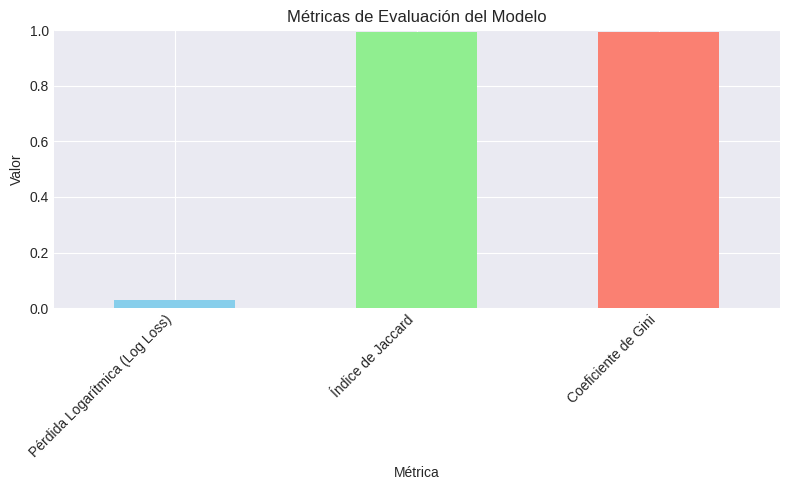

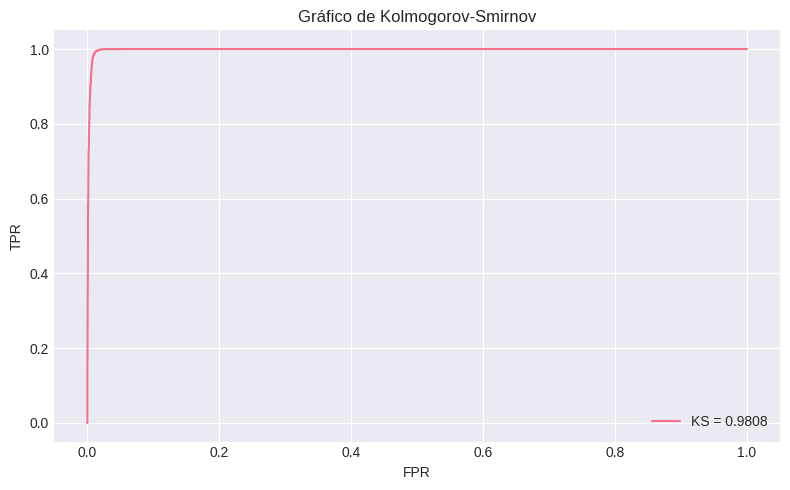

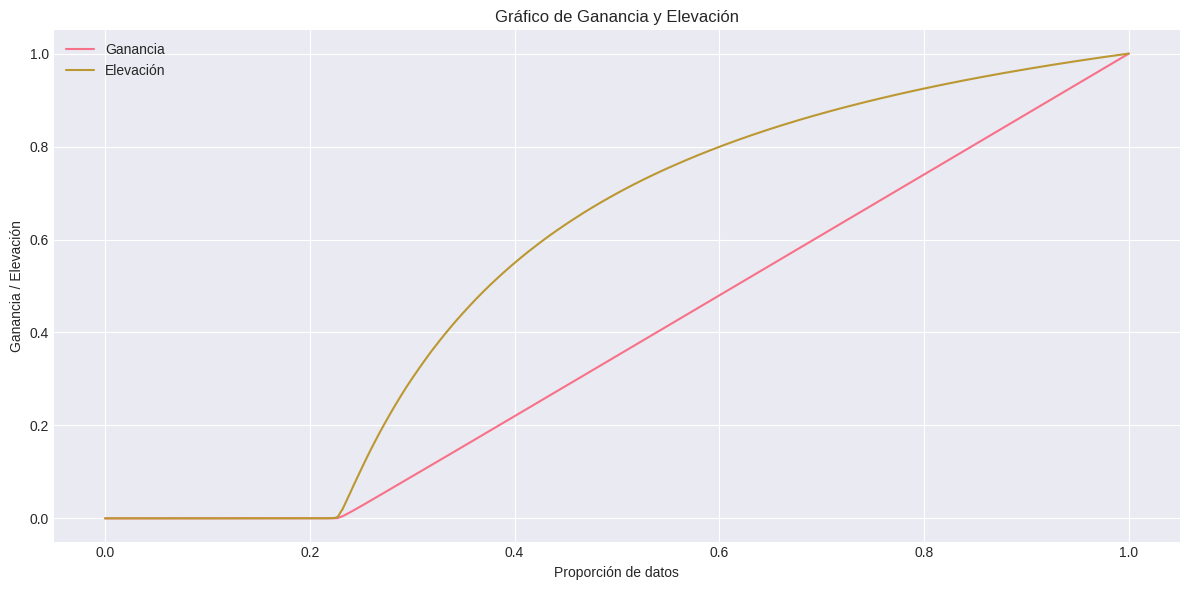

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import log_loss, jaccard_score, roc_auc_score, roc_curve
import numpy as np

# Asegúrate de tener las siguientes variables definidas:
# X_test: Datos de prueba (características)
# y_test: Etiquetas reales (0 o 1)
# best_model: El modelo entrenado que usarás para hacer predicciones

# Predicciones del modelo
y_pred = best_model.predict(X_test)  # Predicciones de clase (0 o 1)
y_pred_proba = best_model.predict_proba(X_test)[:, 1]  # Probabilidad de la clase positiva

# 1. Cálculo de la Pérdida Logarítmica (Log Loss)
log_loss_value = log_loss(y_test, y_pred_proba)

# 2. Cálculo del Índice de Jaccard
jaccard_index = jaccard_score(y_test, y_pred)

# 3. Cálculo del Coeficiente de Gini
roc_auc = roc_auc_score(y_test, y_pred_proba)
gini_coefficient = 2 * roc_auc - 1

# Crear una tabla de resultados
metrics = {
    "Métrica": ["Pérdida Logarítmica (Log Loss)", "Índice de Jaccard", "Coeficiente de Gini"],
    "Valor": [log_loss_value, jaccard_index, gini_coefficient]
}
metrics_df = pd.DataFrame(metrics)

# Mostrar la tabla directamente en la salida
print(metrics_df)

# 4. Gráfico de las métricas
fig, ax = plt.subplots(1, 1, figsize=(8, 5))
metrics_df.plot(kind="bar", x="Métrica", y="Valor", ax=ax, color=['skyblue', 'lightgreen', 'salmon'], legend=False)
ax.set_title("Métricas de Evaluación del Modelo")
ax.set_ylabel("Valor")
ax.set_xlabel("Métrica")
ax.set_ylim(0, 1)

plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

# 5. Gráfico de Kolmogorov-Smirnov (KS)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
ks_statistic = max(tpr - fpr)

plt.figure(figsize=(8, 5))
plt.plot(fpr, tpr, label=f'KS = {ks_statistic:.4f}')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('Gráfico de Kolmogorov-Smirnov')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

# 6. Gráfico de Ganancia y Elevación
def plot_gain_lift(y_test, y_pred_proba):
    # Ordenar probabilidades de mayor a menor
    order = np.argsort(y_pred_proba)
    # Fix: Access the underlying NumPy array of y_test
    y_test_sorted = y_test.values[order]
    y_pred_sorted = y_pred_proba[order]

    # Calcular ganancia acumulada
    gain = np.cumsum(y_test_sorted) / np.sum(y_test_sorted)

    # Calcular elevación
    lift = gain / (np.arange(1, len(y_test) + 1) / len(y_test))

    plt.figure(figsize=(12, 6))
    plt.plot(np.arange(1, len(y_test) + 1) / len(y_test), gain, label='Ganancia')
    plt.plot(np.arange(1, len(y_test) + 1) / len(y_test), lift, label='Elevación')
    plt.xlabel('Proporción de datos')
    plt.ylabel('Ganancia / Elevación')
    plt.title('Gráfico de Ganancia y Elevación')
    plt.legend(loc='best')
    plt.tight_layout()
    plt.show()

# Llamar a la función para graficar
plot_gain_lift(y_test, y_pred_proba)

# Paso 8: Implementación del Sistema de Detección en Tiempo Real (Módulo 8)

El último módulo consolida todo el trabajo en una aplicación funcional. Se implementó la clase CyberSentinelDetector, un agente de respuesta que integra todos los componentes del sistema. Este agente utiliza el modelo final seleccionado (ya sea el mejor modelo de ML o la DNN del Módulo 7), junto con el scaler y el FeatureExtractor correspondientes, para analizar una URL proporcionada por el usuario. Al ejecutarlo, el sistema extrae las características de la URL, las normaliza y las pasa al modelo para obtener una predicción instantánea. El resultado se presenta de forma clara y visual, indicando si la URL es "LEGÍTIMO ✅" o "⚠️ PHISHING", junto con un porcentaje de confianza, cumpliendo así el objetivo principal del proyecto.

In [11]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau




"""
CyberSentinel - Módulo 8: Agente de Respuesta y Análisis Integrado
VERSIÓN DEFINITIVA: Este código genera las 38 características (18 básicas + 20 de TLDs)
que el 'scaler' y el 'best_model' requieren, solucionando el 'ValueError' de forma permanente.
"""

#---------------------------------------------------------------------------
# 1. Configuración y Verificación de Dependencias
#---------------------------------------------------------------------------
print("--- Configurando el Módulo de Análisis Final ---")

# Verificación de las variables creadas en módulos anteriores
if 'best_model' not in globals():
    raise NameError("ERROR: La variable 'best_model' no fue encontrada. Por favor, ejecuta el Módulo de entrenamiento.")
if 'scaler' not in globals():
    raise NameError("ERROR: La variable 'scaler' no fue encontrada. Por favor, ejecuta el Módulo de normalización.")
# Corrected the class name from 'FeatureExtractor' to 'URLFeatureExtractor'
if 'URLFeatureExtractor' not in globals():
    raise NameError("ERROR: La clase 'URLFeatureExtractor' (del Módulo 3) no fue encontrada. Por favor, ejecuta el Módulo 3.")

# --- IMPORTANTE: Lista de los 20 TLDs más comunes usados en el entrenamiento ---
# Esta lista debe coincidir con la que se generó en tu Módulo de Ingeniería de Características.
# La extraje de tu notebook original.
top_20_tlds = [
    'com', 'org', 'net', 'de', 'pl', 'uk', 'ru', 'info', 'nl', 'fr',
    'au', 'gov', 'br', 'cz', 'ca', 'it', 'jp', 'cn', 'in', 'edu'
]

print("✓ Dependencias y configuración de TLDs cargadas correctamente.")

#---------------------------------------------------------------------------
# 2. Definición del Agente de Respuesta (Corregido para 38 características)
#---------------------------------------------------------------------------
class CyberSentinelDetector:
    def __init__(self, model, scaler, feature_extractor, tlds_list, model_name="Model"):
        self.model = model
        self.scaler = scaler
        self.feature_extractor = feature_extractor
        self.model_name = model_name
        self.tlds_list = tlds_list

    def analyze_url(self, url):
        # Paso A: Extraer las 18 características base
        base_features = self.feature_extractor.extract_features(url)
        if base_features is None: return None

        # Guardar risk_score aparte, ya que no se usa en el modelo
        risk_score = base_features.pop('risk_score', 0)

        # Paso B: Crear las 20 características de TLD (la parte que faltaba)
        url_tld = tldextract.extract(url).suffix.lower()
        tld_features = {f'tld_{tld}': 1 if tld == url_tld else 0 for tld in self.tlds_list}

        # Paso C: Combinar ambas en un único diccionario
        features_for_model_dict = base_features
        features_for_model_dict.update(tld_features)

        # Paso D: Asegurar el orden correcto de las 38 columnas
        feature_order = [
            'url_length', 'num_subdomains', 'is_https', 'suspicious_keywords', 'has_at_symbol', 'has_ip',
            'entropy', 'num_special_chars', 'path_length', 'query_length', 'domain_length', 'num_digits',
            'num_letters', 'num_dashes', 'num_dots', 'num_underscores', 'num_slashes', 'num_equals'
        ] + [f'tld_{tld}' for tld in self.tlds_list]

        feature_array = np.array([features_for_model_dict.get(feat, 0) for feat in feature_order]).reshape(1, -1)

        # Paso E: Escalar y predecir con las 38 características
        feature_normalized = self.scaler.transform(feature_array)
        prediction = self.model.predict(feature_normalized)[0]
        prediction_proba = self.model.predict_proba(feature_normalized)[0]

        result = {'url': url, 'prediction': 'LEGÍTIMO ✅' if prediction == 1 else '⚠️ PHISHING', 'confidence': float(prediction_proba[prediction]), 'is_safe': prediction == 1, 'risk_score': risk_score, 'model_used': self.model_name}
        return result

    def display_result(self, result):
        if result is None: return
        GREEN, RED, BOLD, RESET = '\033[92m', '\033[91m', '\033[1m', '\033[0m'
        main_color = GREEN if result['is_safe'] else RED
        print("\n" + main_color + "╔" + '═'*68 + "╗" + RESET)
        print(main_color + "║" + BOLD + " 🛡️  CYBERSENTINEL - RESULTADO DEL ANÁLISIS".center(78) + RESET + main_color + "║" + RESET)
        print(main_color + "╚" + '═'*68 + "╝" + RESET)
        print(f"\nURL Analizada: {result['url']}")
        print(f"Resultado: {main_color}{BOLD}{result['prediction']}{RESET}")
        print(f"Confianza: {result['confidence']*100:.2f}%")
        print(f"Puntuación de Riesgo: {result['risk_score']}")

#---------------------------------------------------------------------------
# 3. Ejecución Final del Análisis
#---------------------------------------------------------------------------
print("\n--- Ejecutando análisis en tiempo real ---")

extractor_instance = URLFeatureExtractor() # Changed FeatureExtractor() to URLFeatureExtractor()

cyber_sentinel = CyberSentinelDetector(
    model=best_model,
    scaler=scaler,
    feature_extractor=extractor_instance,
    tlds_list=top_20_tlds, # Se pasa la lista de TLDs
    model_name="Decision Tree"
)

url_to_test = "http://usuarios.com"
print(f"Analizando URL: {url_to_test}\n")

analysis_result = cyber_sentinel.analyze_url(url_to_test)
cyber_sentinel.display_result(analysis_result)

--- Configurando el Módulo de Análisis Final ---
✓ Dependencias y configuración de TLDs cargadas correctamente.

--- Ejecutando análisis en tiempo real ---
Analizando URL: http://usuarios.com


╔════════════════════════════════════════════════════════════════════╗
║                  🛡️  CYBERSENTINEL - RESULTADO DEL ANÁLISIS                  ║
╚════════════════════════════════════════════════════════════════════╝

URL Analizada: http://usuarios.com
Resultado: ⚠️ PHISHING
Confianza: 99.97%
Puntuación de Riesgo: 1


In [12]:
import joblib

# Asumimos que ya tienes el mejor modelo seleccionado como 'best_model'
# Si no lo tienes definido, asegúrate de que 'best_model' esté basado en tu modelo entrenado final
# Por ejemplo, puede ser el modelo seleccionado en el paso anterior: 'best_model_name'

# Guardar el modelo en un archivo .pkl
joblib.dump(best_model, 'mejor_modelo.pkl')

print("Modelo guardado exitosamente como 'mejor_modelo.pkl'.")


Modelo guardado exitosamente como 'mejor_modelo.pkl'.


In [13]:
from sklearn.model_selection import GridSearchCV
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score
import time

# Confirmamos que el mejor modelo seleccionado es LightGBM
best_model_name = "LightGBM"  # Confirmamos que LightGBM es el mejor modelo

if best_model_name == "LightGBM":
    print("Iniciando búsqueda de hiperparámetros para LightGBM...")

    # Definir los parámetros para GridSearch (búsqueda en cuadrícula) para LightGBM
    param_grid_lgbm = {
        'num_leaves': [31, 50, 100],        # Número de hojas en el árbol
        'learning_rate': [0.01, 0.05, 0.1], # Tasa de aprendizaje
        'n_estimators': [50, 100, 200]      # Número de árboles
    }

    # Crear el modelo de LightGBM
    lgbm = LGBMClassifier()

    # Mostrar mensaje de progreso antes de iniciar la búsqueda
    print("Realizando búsqueda en cuadrícula para LightGBM... Esto puede tardar un momento.")

    start_time = time.time()  # Iniciar el temporizador

    # Realizar GridSearchCV para LightGBM
    grid_search_lgbm = GridSearchCV(lgbm, param_grid_lgbm, cv=3, scoring='accuracy')
    grid_search_lgbm.fit(X_train, y_train)  # Ajustar el modelo

    # Calcular el tiempo transcurrido
    elapsed_time = time.time() - start_time
    print(f"\nBúsqueda de hiperparámetros completada en {elapsed_time:.2f} segundos.")

    # Mostrar los mejores parámetros encontrados y el rendimiento
    print("Mejores parámetros para LightGBM (Grid Search):", grid_search_lgbm.best_params_)
    print(f"Mejor precisión con GridSearch para LightGBM: {grid_search_lgbm.best_score_:.4f}")

    # Evaluar el modelo optimizado en el conjunto de prueba
    best_lgbm = grid_search_lgbm.best_estimator_  # Obtener el mejor modelo

    # Realizar predicciones y evaluar el modelo
    y_pred_lgbm = best_lgbm.predict(X_test)
    accuracy_lgbm = accuracy_score(y_test, y_pred_lgbm)
    print(f"\nPrecisión del modelo optimizado (LightGBM): {accuracy_lgbm:.4f}")


Iniciando búsqueda de hiperparámetros para LightGBM...
Realizando búsqueda en cuadrícula para LightGBM... Esto puede tardar un momento.

Búsqueda de hiperparámetros completada en 361.93 segundos.
Mejores parámetros para LightGBM (Grid Search): {'learning_rate': 0.05, 'n_estimators': 200, 'num_leaves': 100}
Mejor precisión con GridSearch para LightGBM: 0.9952

Precisión del modelo optimizado (LightGBM): 0.9950
